## Machine Learning
- Data Analysis
- Feature Engineering
- Feature Selection
- Model Building
- Model Deployment

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/train.csv')

In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Check for duplicates

In [5]:
df.duplicated().sum()

np.int64(0)

### Check for Missing Values

In [6]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
missing_value_features = [feature for feature in df if df[feature].isna().sum() > 0]
for feature in missing_value_features :
    print(f"{feature} have : {df[feature].isna().sum()}")

LotFrontage have : 259
Alley have : 1369
MasVnrType have : 872
MasVnrArea have : 8
BsmtQual have : 37
BsmtCond have : 37
BsmtExposure have : 38
BsmtFinType1 have : 37
BsmtFinType2 have : 38
Electrical have : 1
FireplaceQu have : 690
GarageType have : 81
GarageYrBlt have : 81
GarageFinish have : 81
GarageQual have : 81
GarageCond have : 81
PoolQC have : 1453
Fence have : 1179
MiscFeature have : 1406


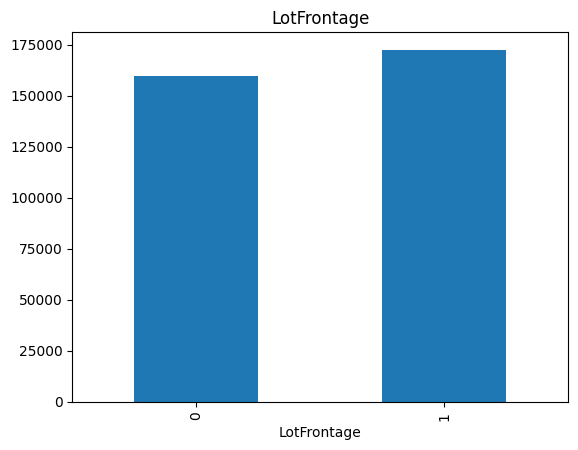

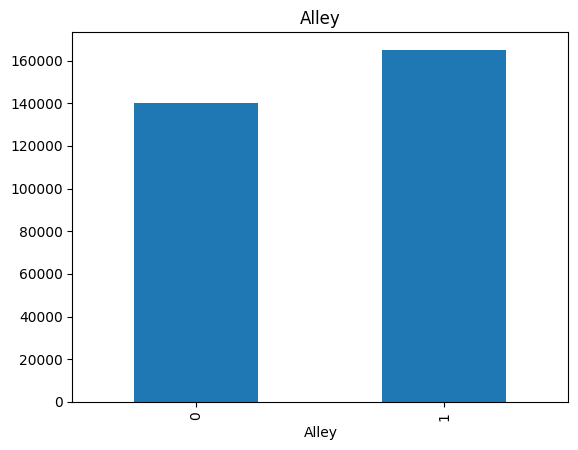

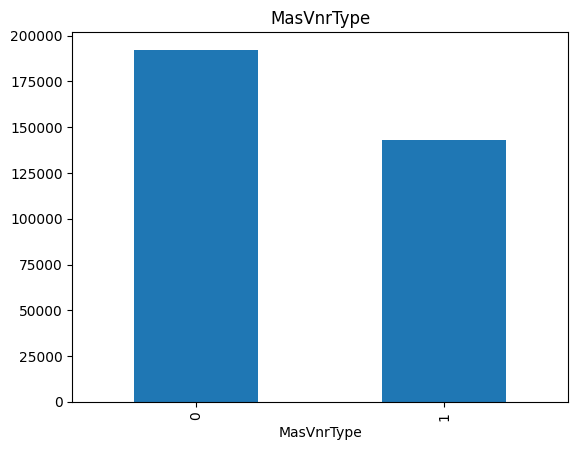

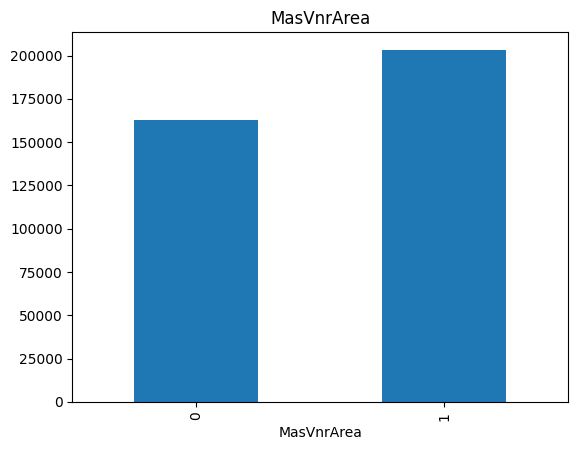

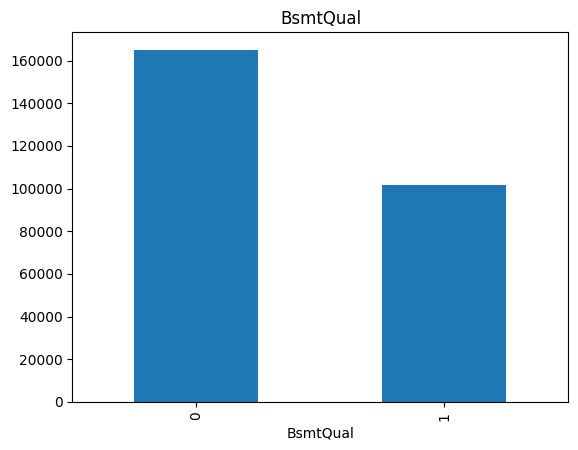

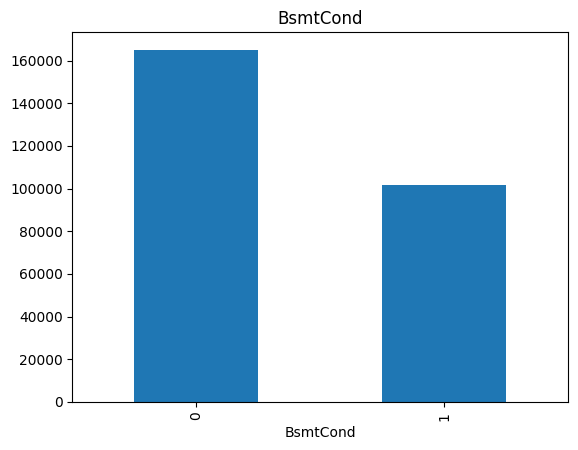

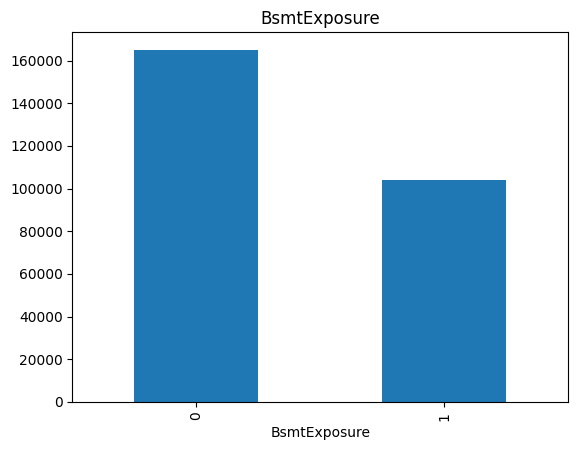

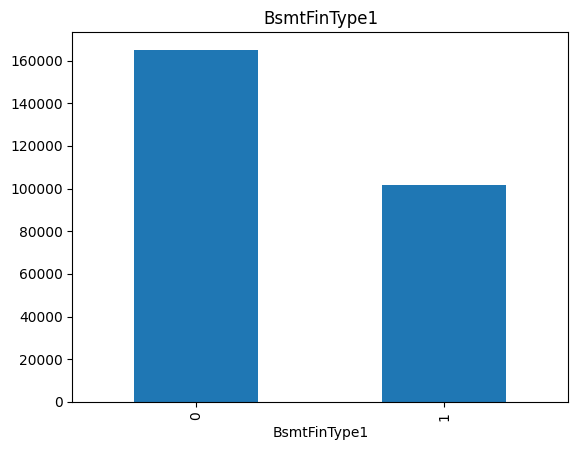

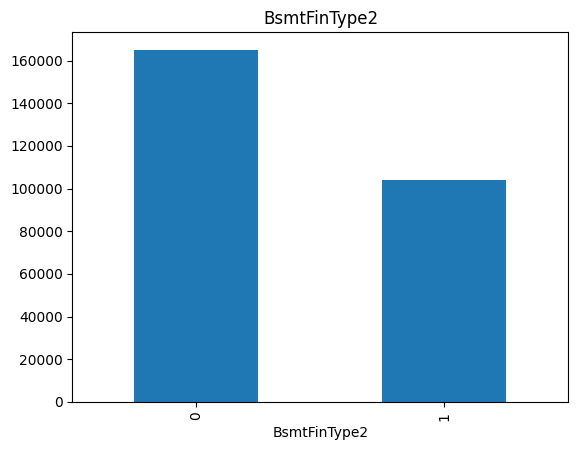

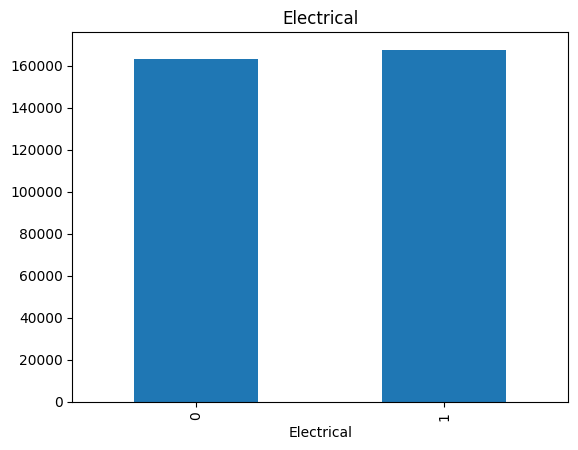

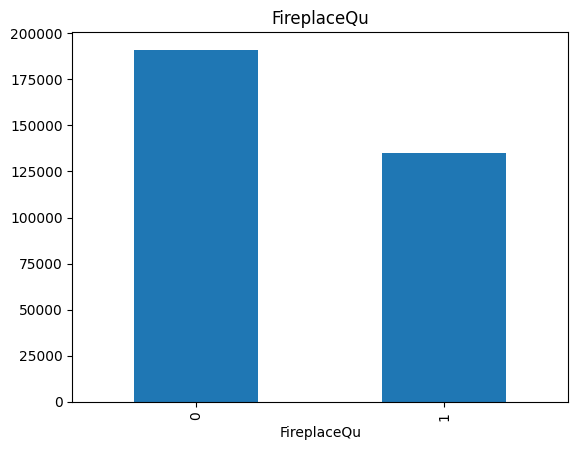

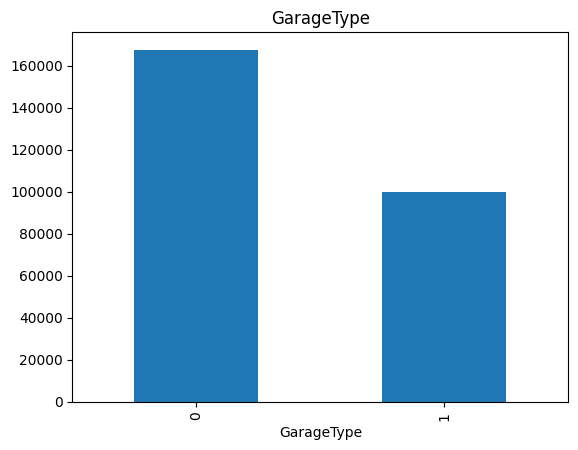

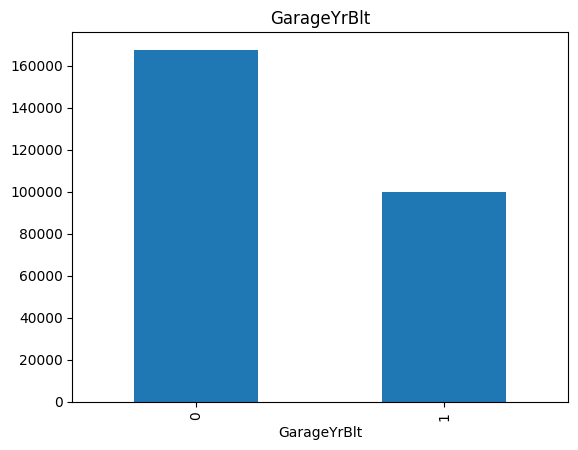

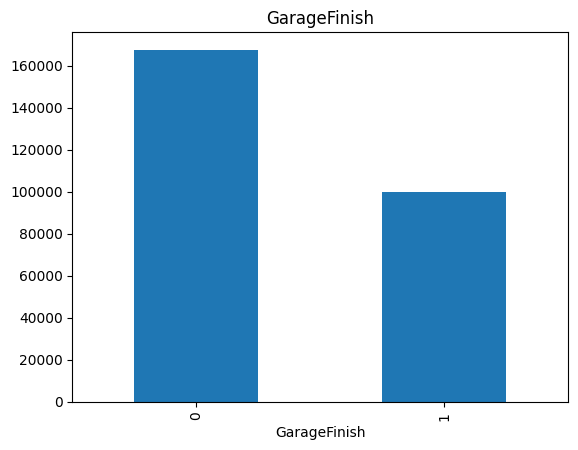

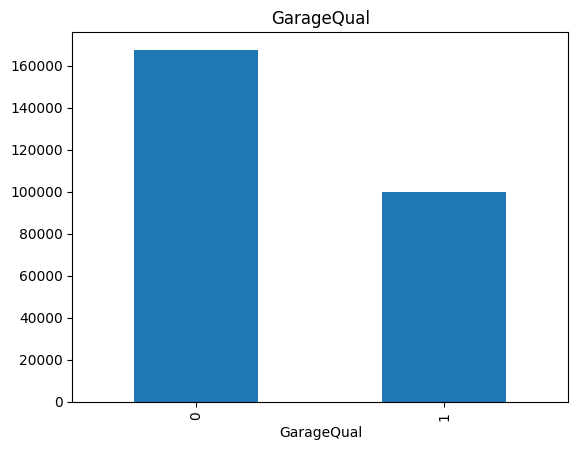

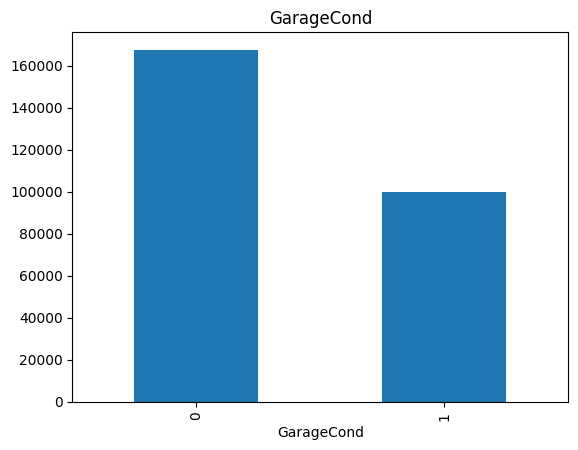

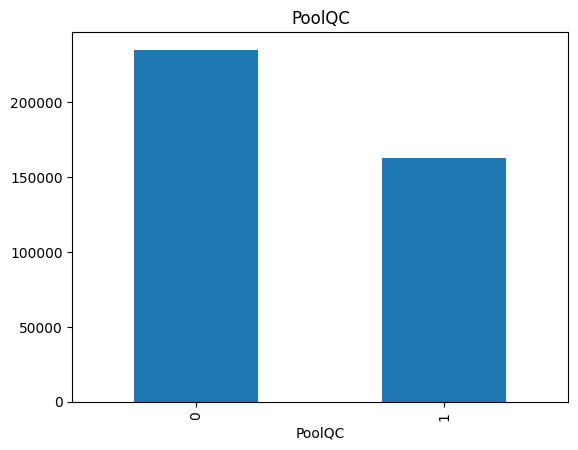

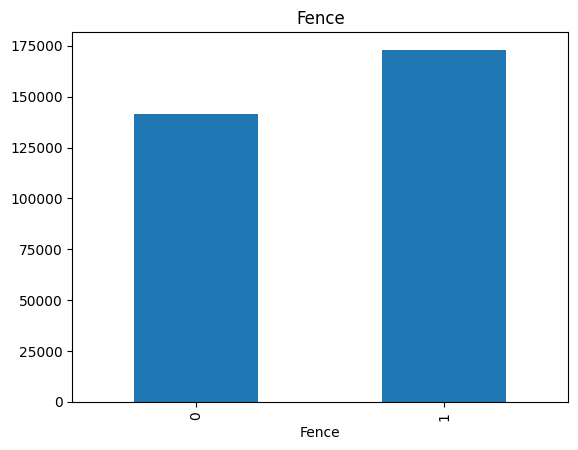

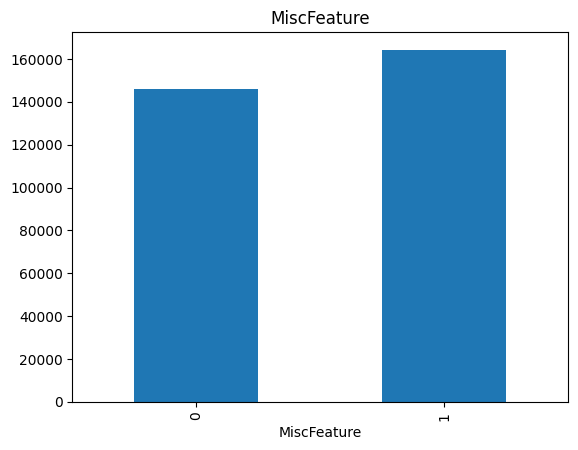

In [8]:
for feature in missing_value_features:
    data = df.copy()

    #Convert missing value to 1
    data[feature] = np.where(data[feature].isna(), 1, 0)

    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

There is a relation between the missing values and the dependent variable. 

### Categorised Features

In [9]:
numeric_features = [ feature for feature in df if df[feature].dtype != 'O']

print(numeric_features)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


we can see that there are year feature in numeric feature

In [10]:
year_features = [feature for feature in numeric_features if "Year" in feature or "Yr" in feature]

print(year_features)
len(year_features)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


4

In [11]:
discrete_numerical_feature = [feature for feature in numeric_features if len((df[feature]).unique()) < 25 and feature not in year_features and feature not in ['Id','SalePrice']]
print(discrete_numerical_feature)
len(discrete_numerical_feature)

['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']


17

In [12]:
continous_feature = [feature for feature in numeric_features if feature not in discrete_numerical_feature+year_features and feature not in ['Id','SalePrice']]

In [13]:
categorical_feature = [feature for feature in df if feature not in numeric_features]

print(f"Total features : {len(df.columns)}")
print(f"Number of numerical feature  = {len(numeric_features)}")
print(numeric_features)
print(f"\nNumber of year feature = {len(year_features)}")
print(year_features)
print(f"\nNumber of discrete numerical feature = {len(discrete_numerical_feature)}")
print(discrete_numerical_feature)
print(f"\nNumber of continous numerical feature = {len(continous_feature)}")
print(continous_feature)
print(f"\nNumber of categorical feature = {len(categorical_feature)}")
print(categorical_feature)

Total features : 81
Number of numerical feature  = 38
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Number of year feature = 4
['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Number of discrete numerical feature = 17
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']

Number of continous numerical feature = 15
['LotFrontage', '

## Year Features

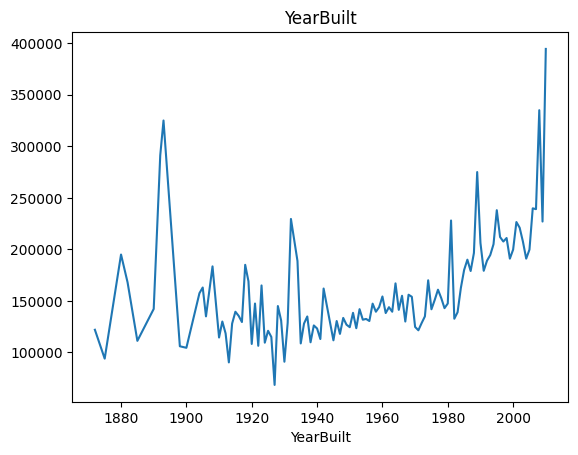

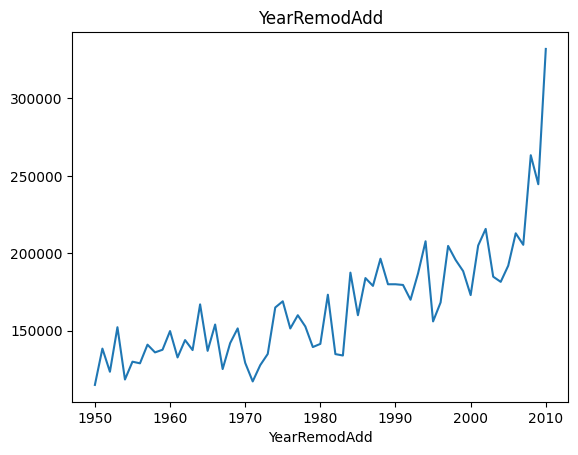

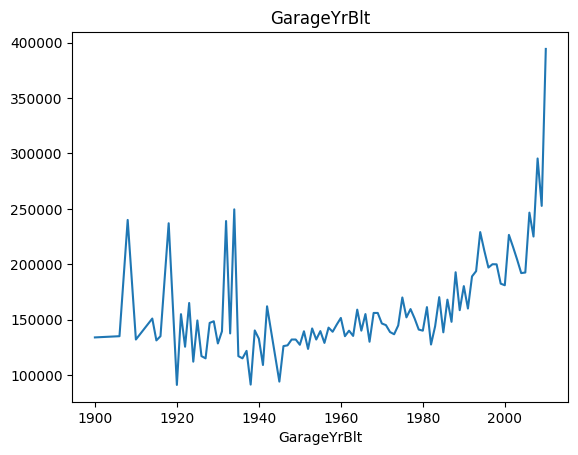

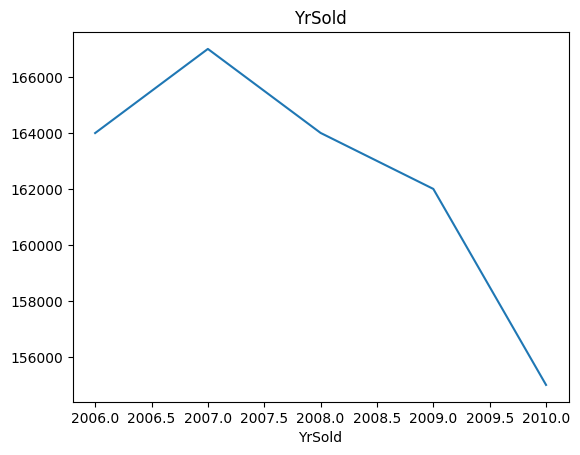

In [14]:
for feature in year_features:
    data = df.copy()
    
    data.groupby(feature)['SalePrice'].median().plot.line()
    plt.title(feature)
    plt.show()

We can see that the sale price increases over the years for year build, year remodel and year of the garage build. 

But,
The price decreases over the years

### Discrete Features

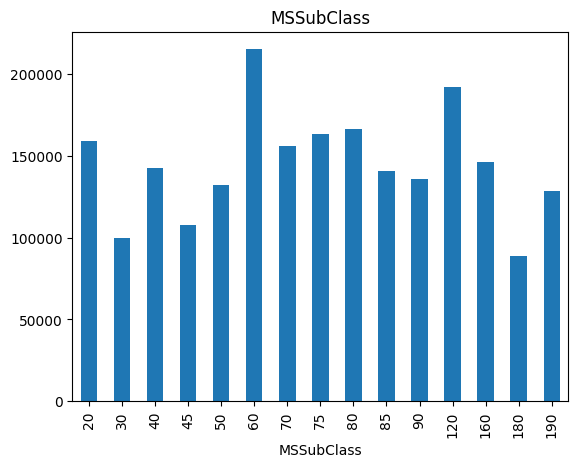

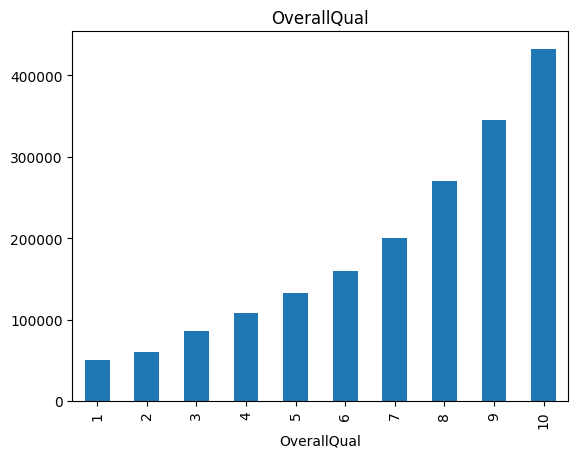

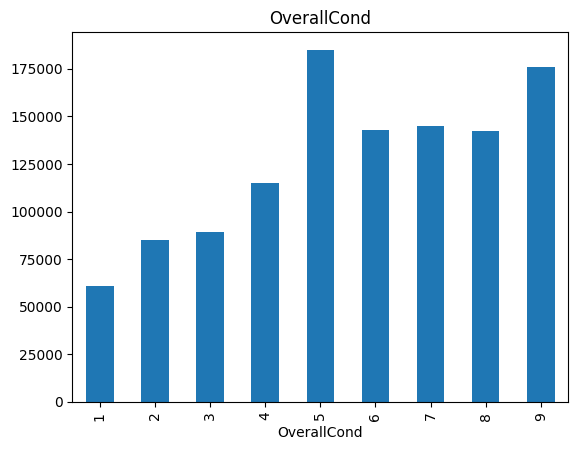

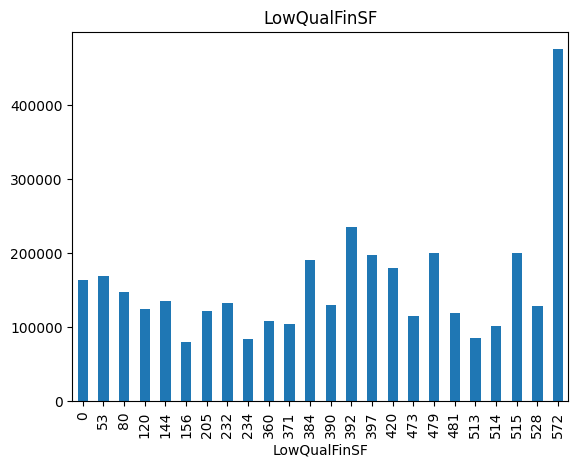

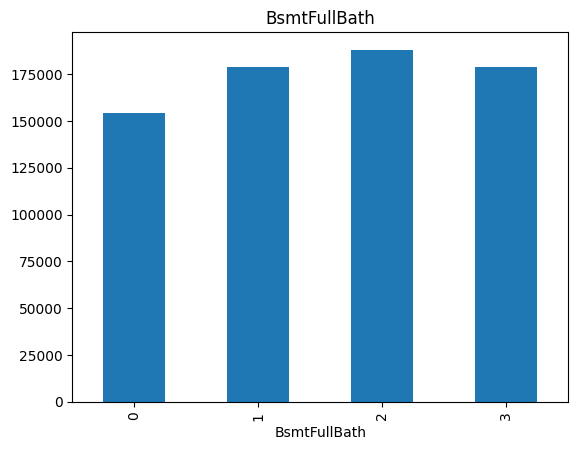

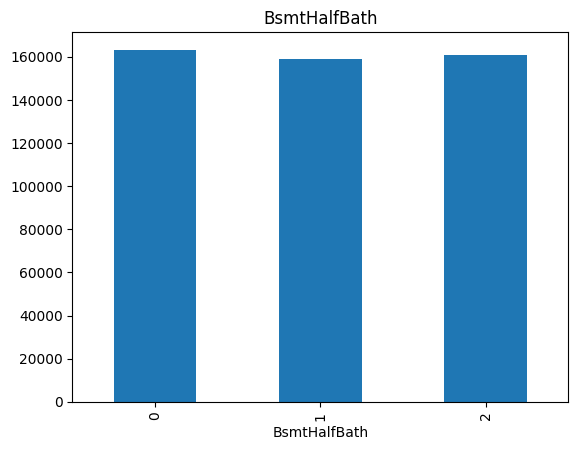

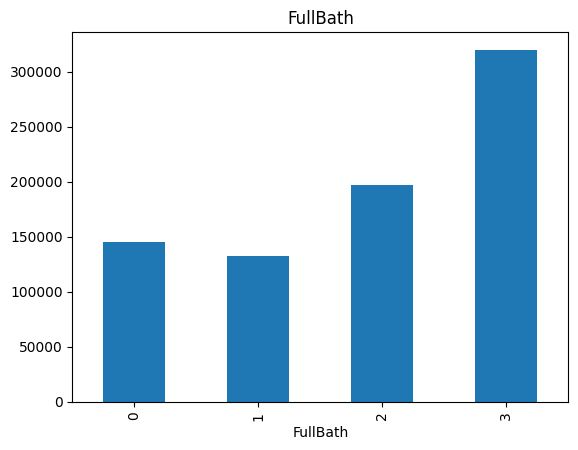

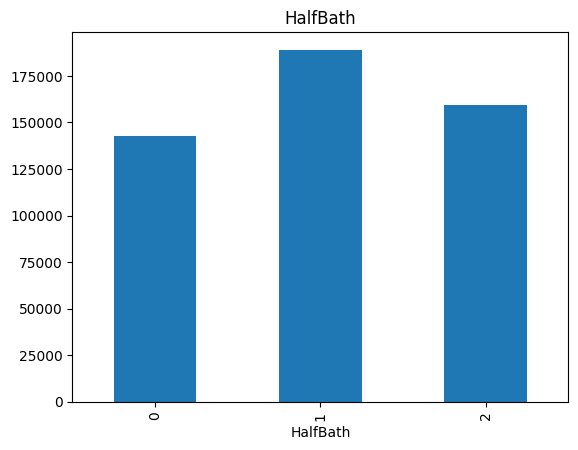

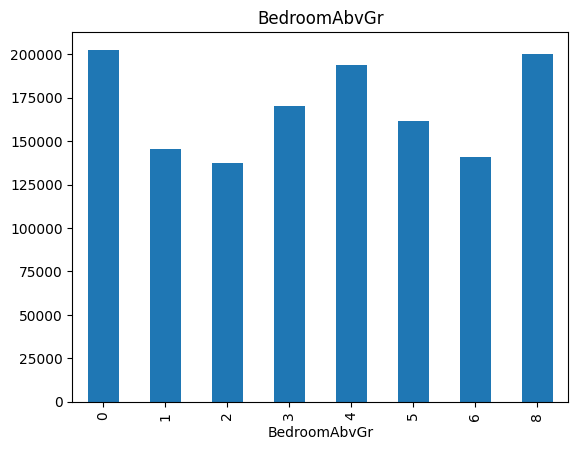

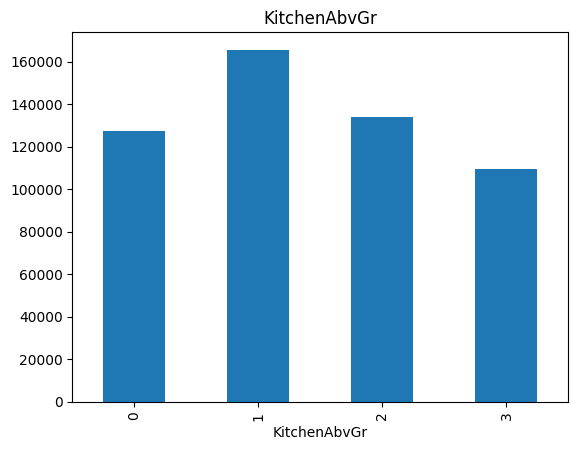

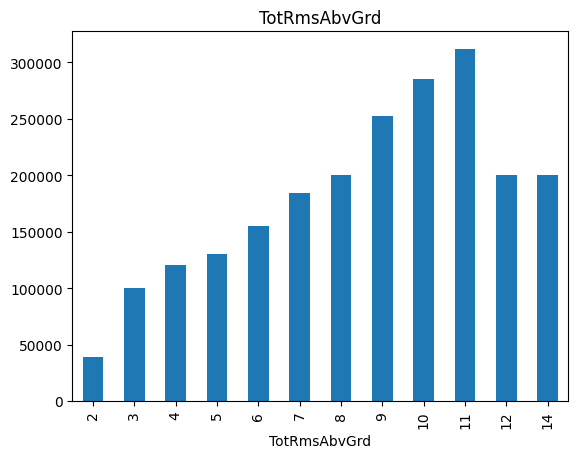

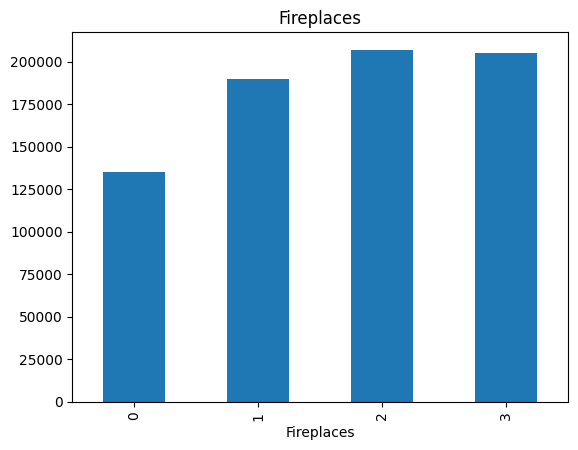

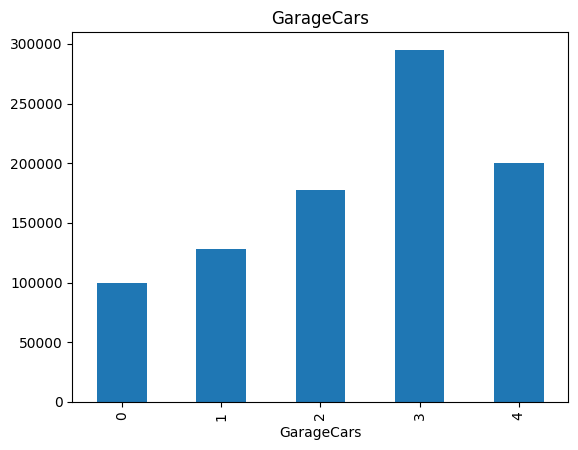

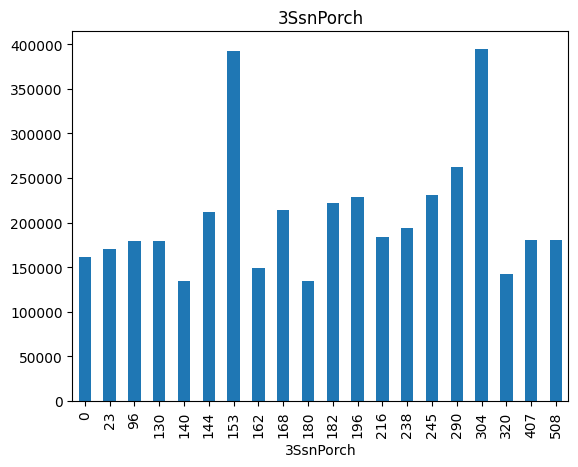

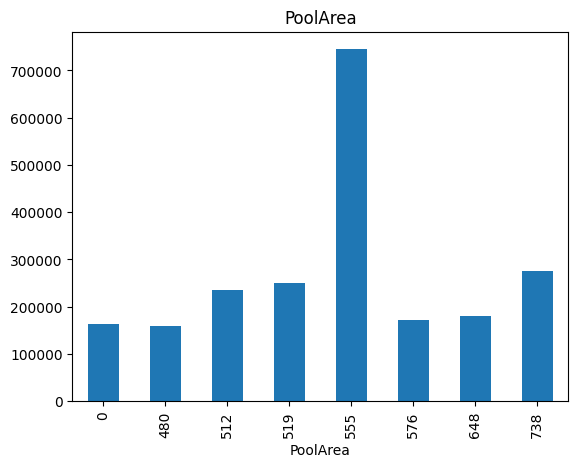

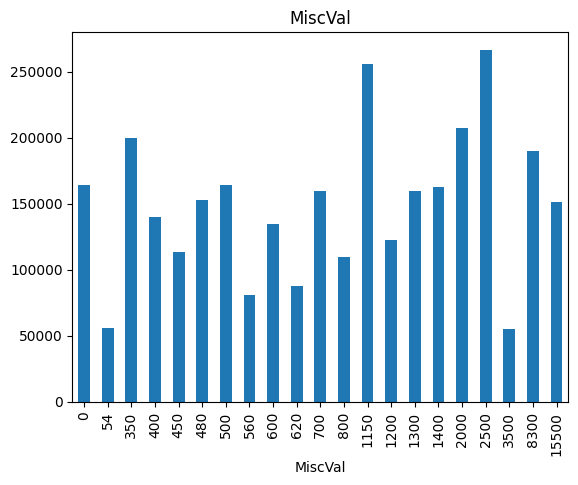

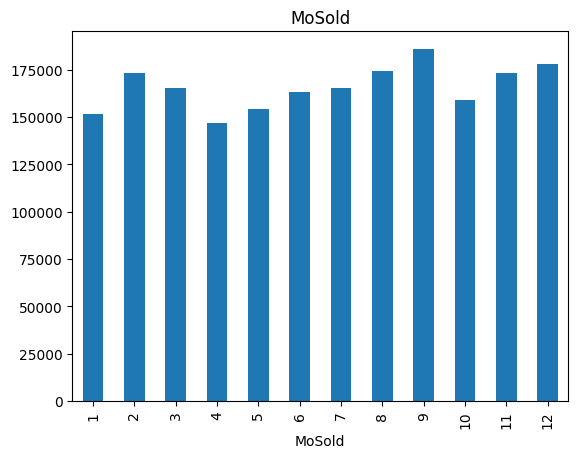

In [34]:
for feature in discrete_numerical_feature:
    data = df.copy()

    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

### Continous Features

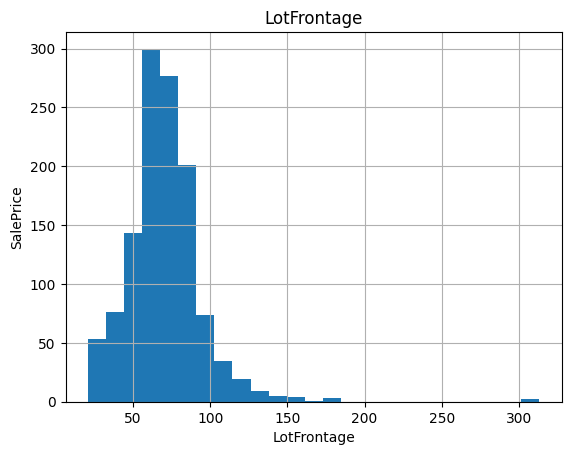

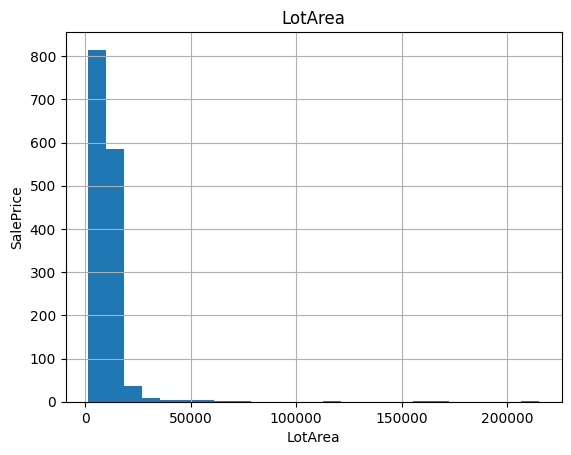

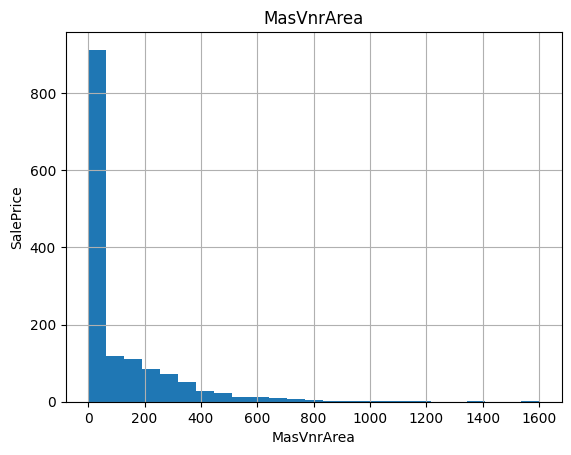

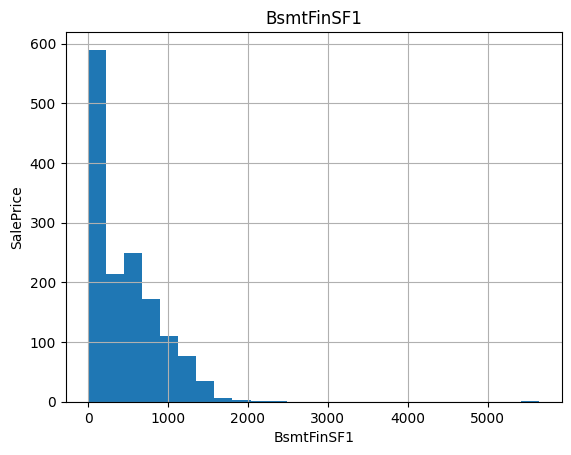

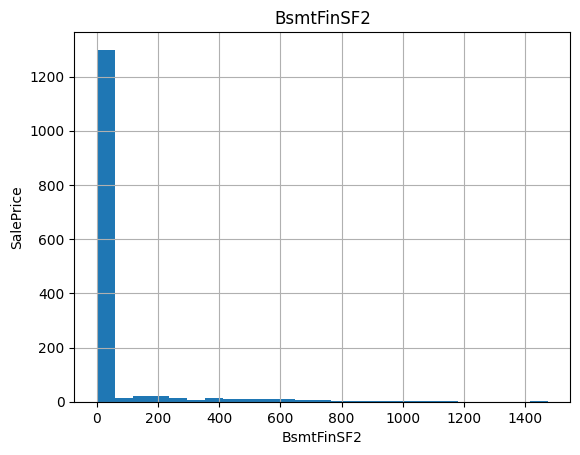

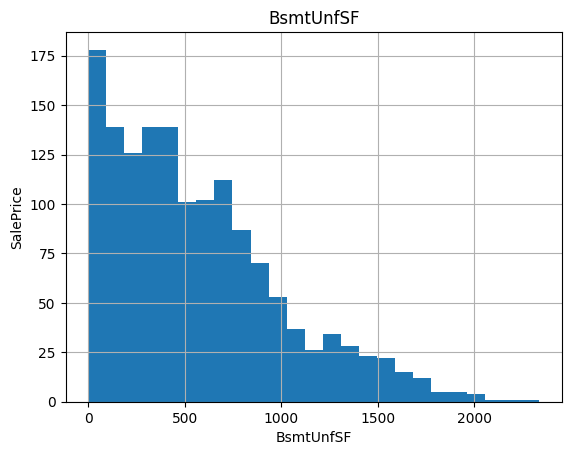

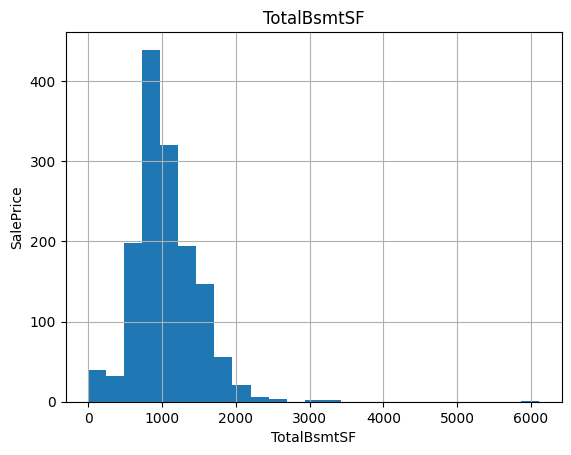

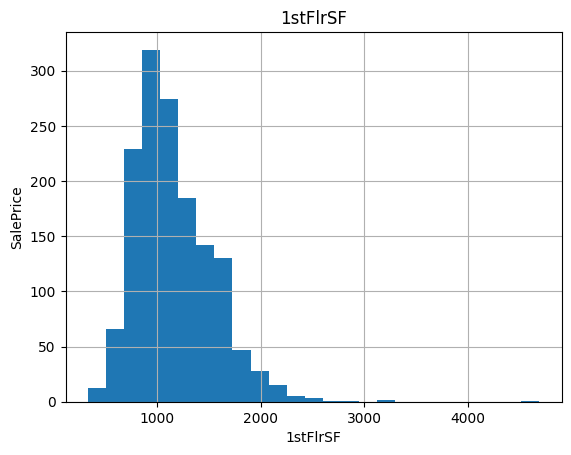

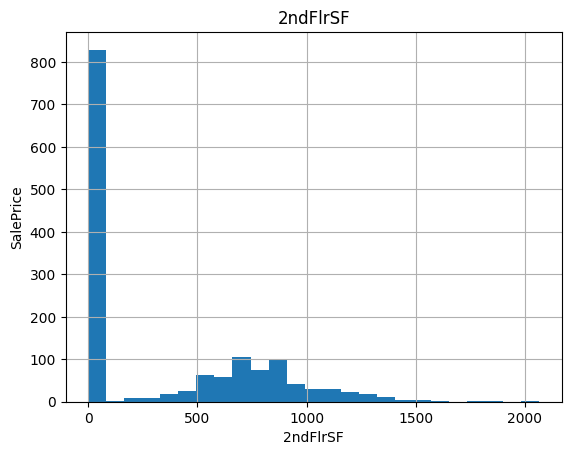

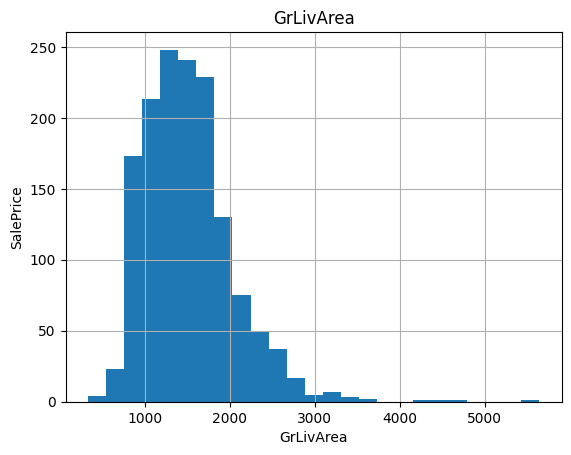

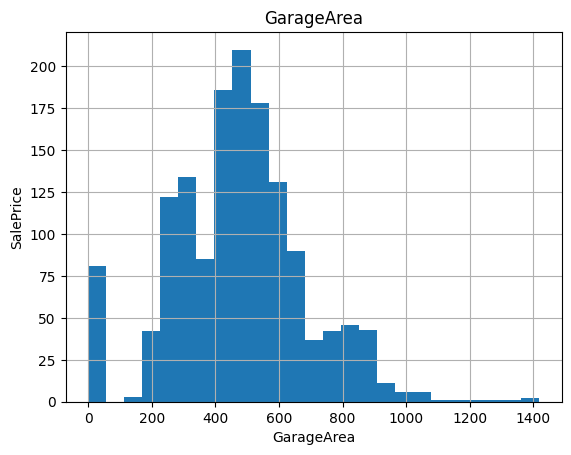

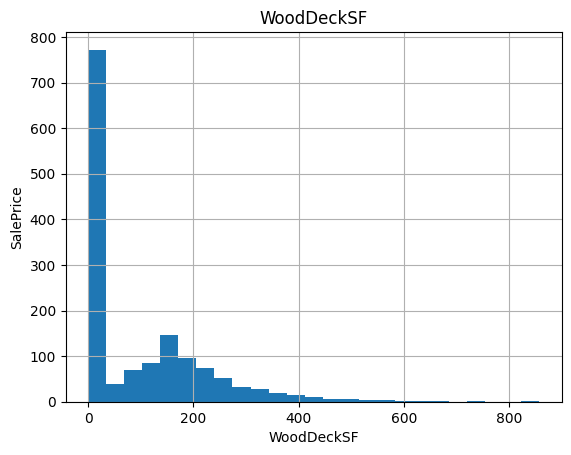

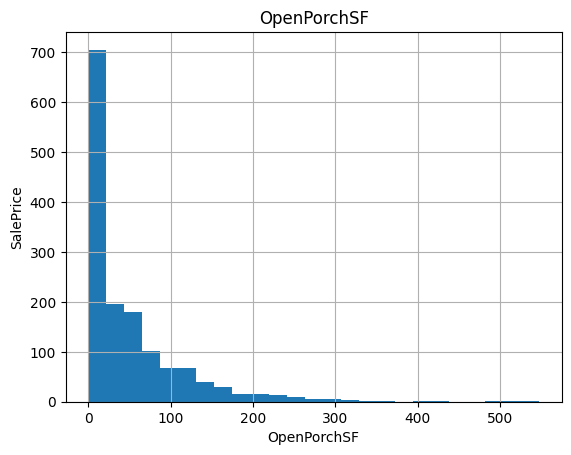

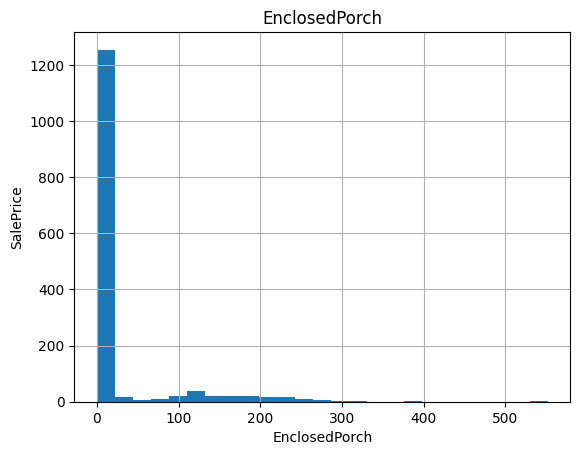

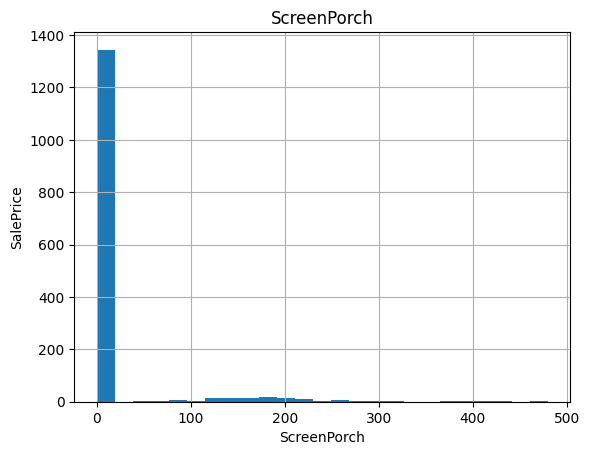

In [17]:
for feature in continous_feature:
    data = df.copy()

    data[feature].hist(bins=25)
    plt.ylabel('SalePrice')
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()


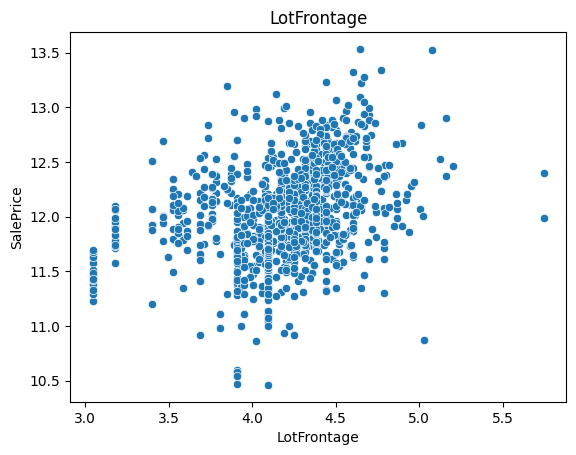

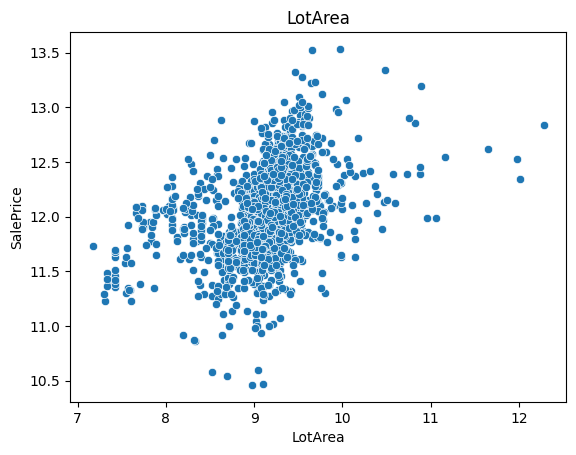

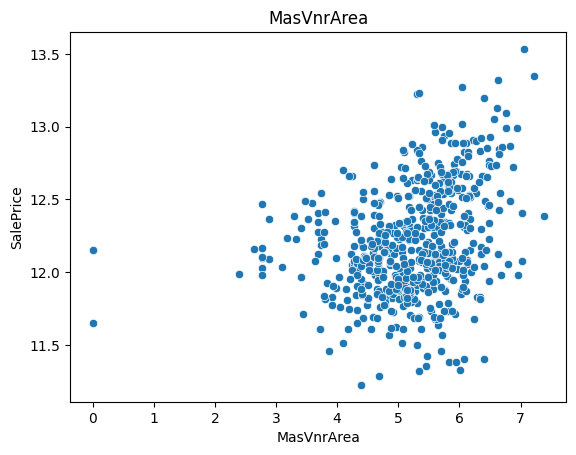

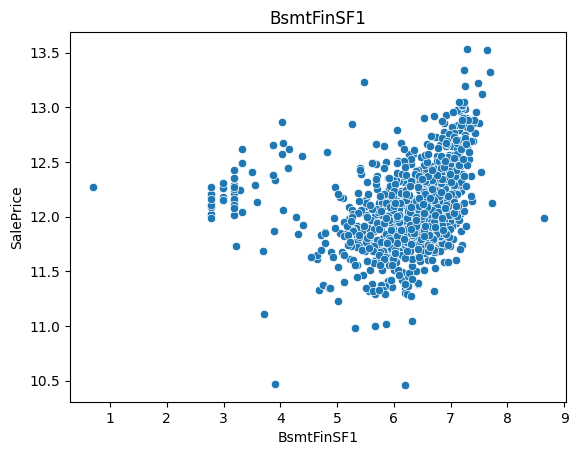

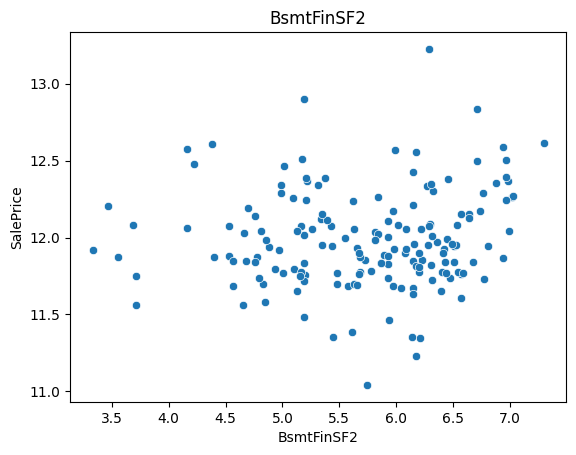

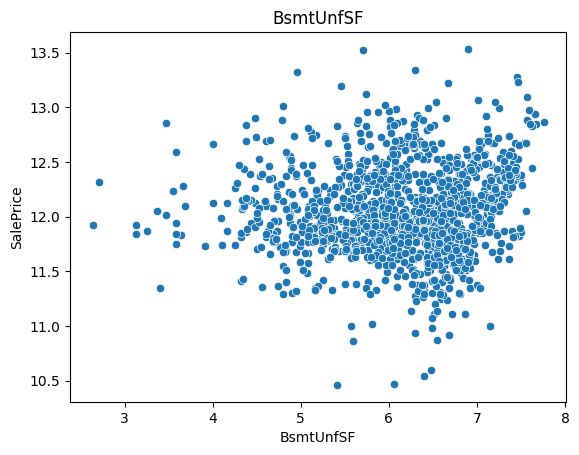

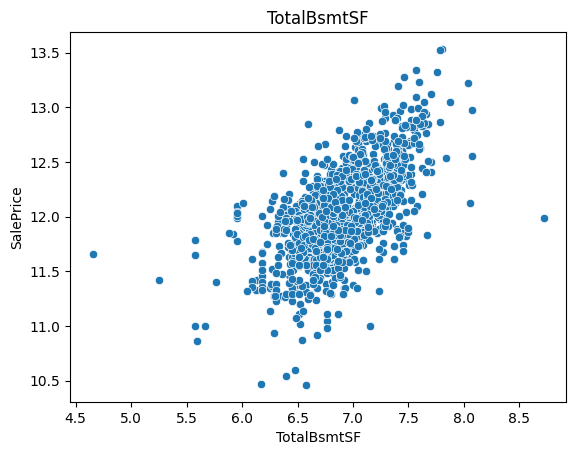

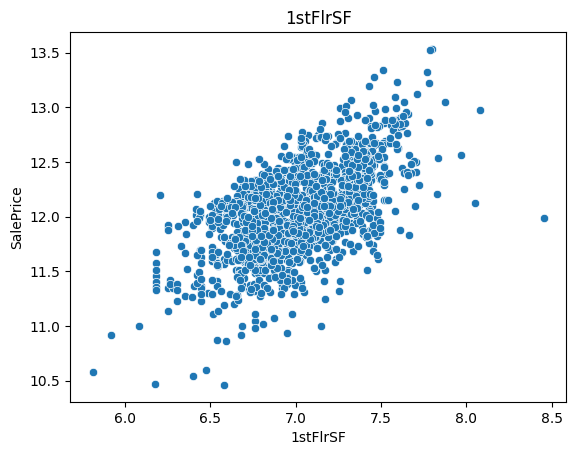

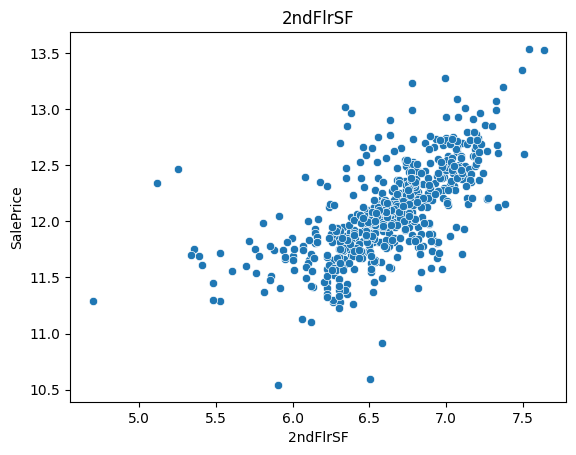

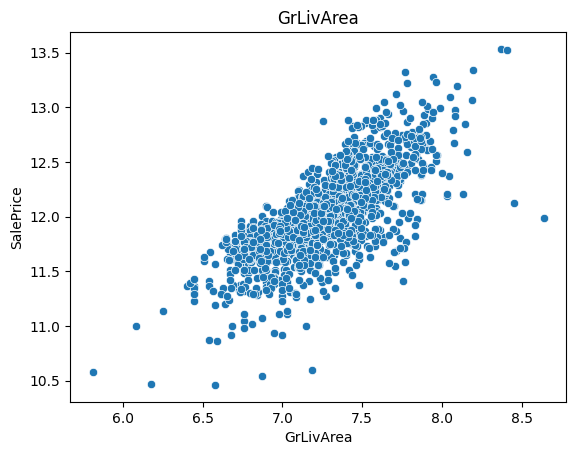

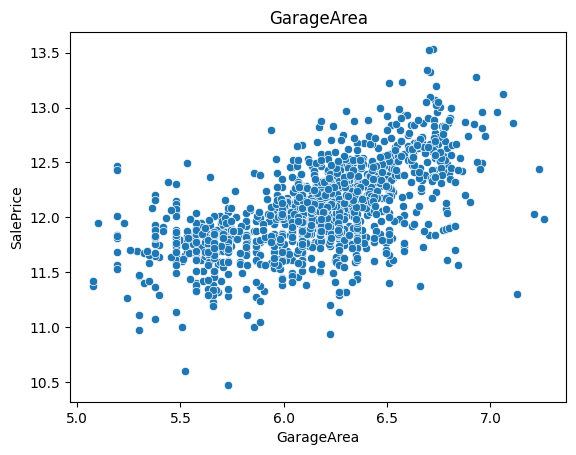

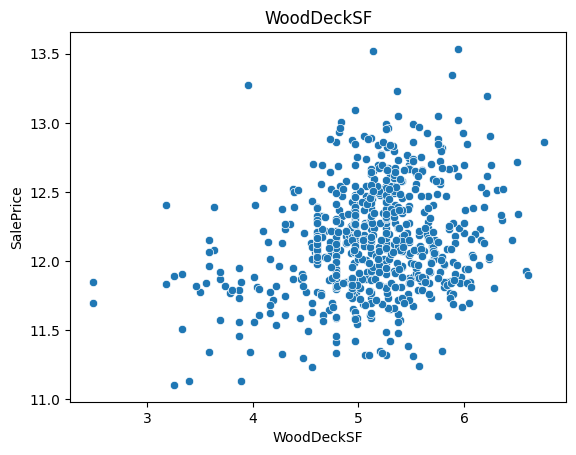

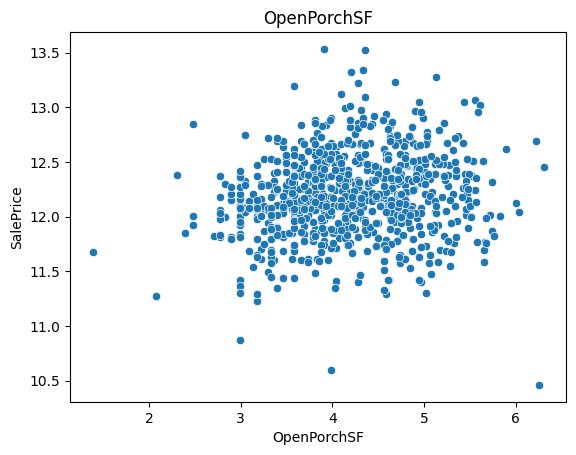

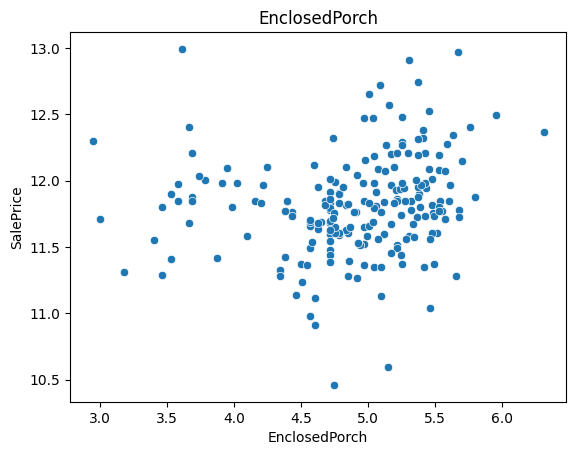

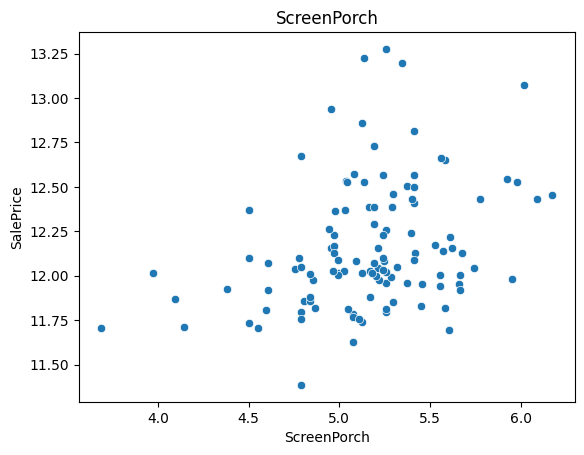

In [26]:
for feature in continous_feature:
    data = df.copy()

    data[feature] = np.log(data[feature])
    data['SalePrice'] = np.log(data['SalePrice'])
    # plt.scatter(data[feature],data['SalePrice'])
    sns.scatterplot(data=data,x=data[feature],y=data['SalePrice'])
    plt.title(feature)
    plt.show()

## Outliers


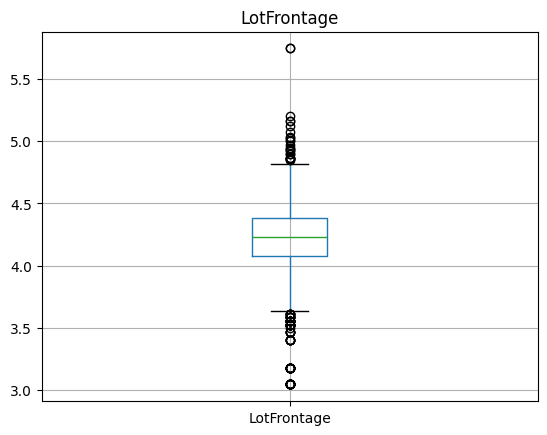

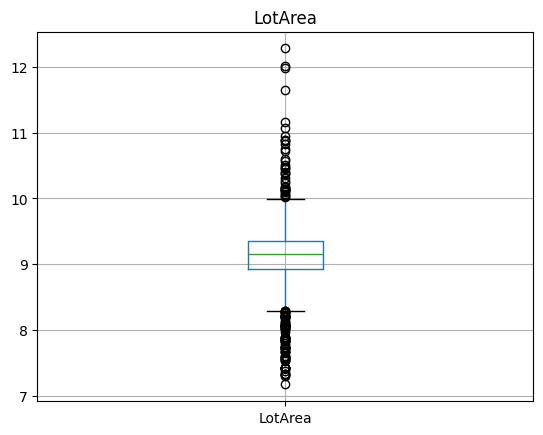

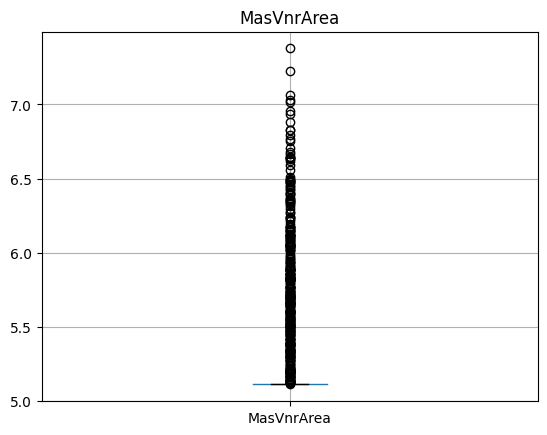

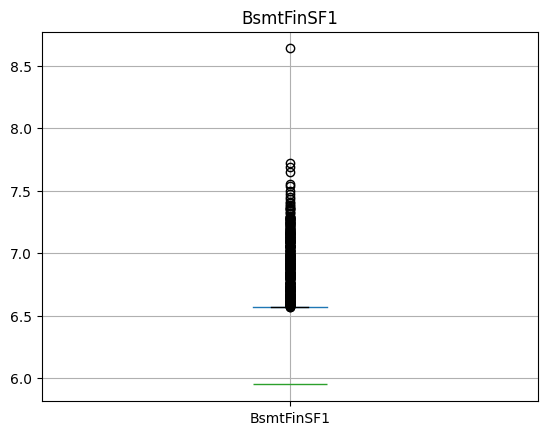

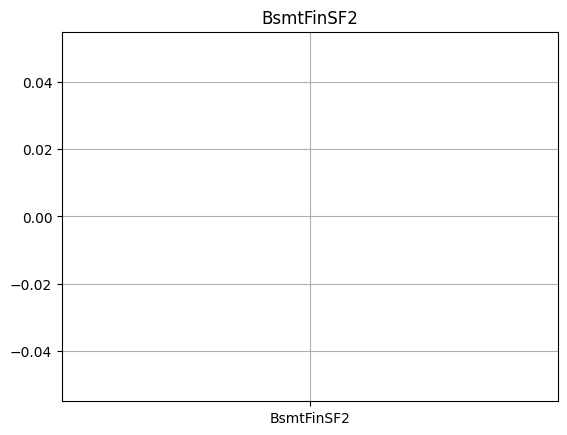

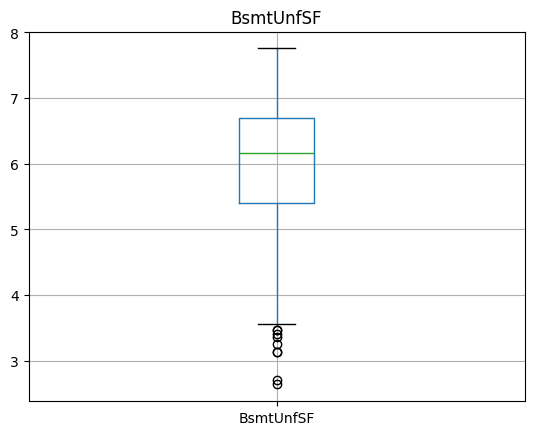

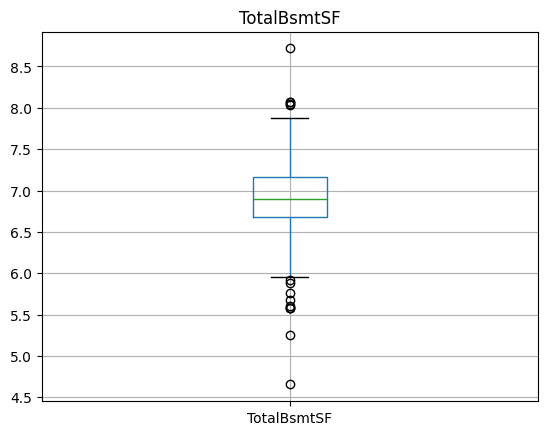

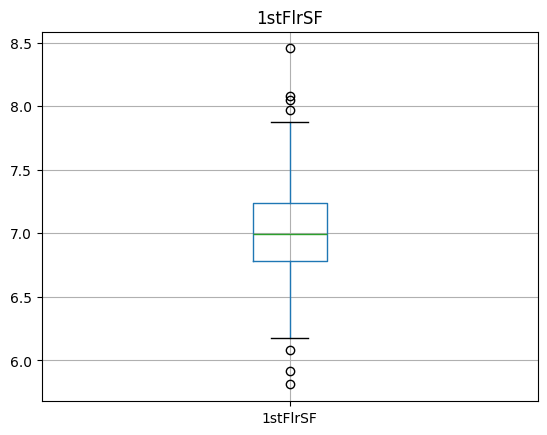

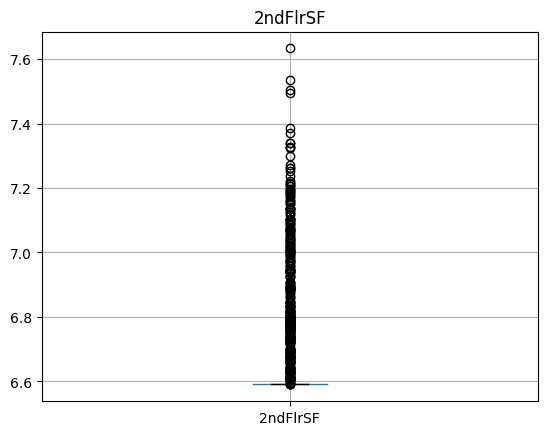

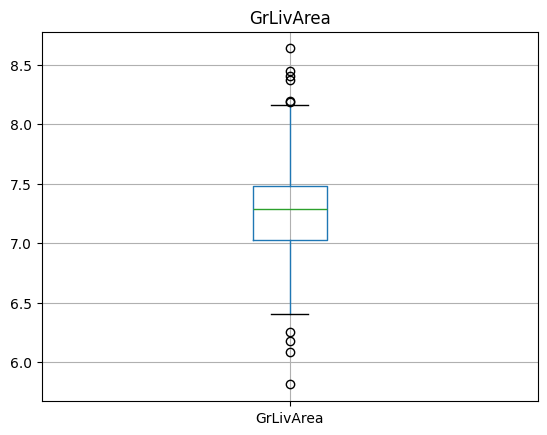

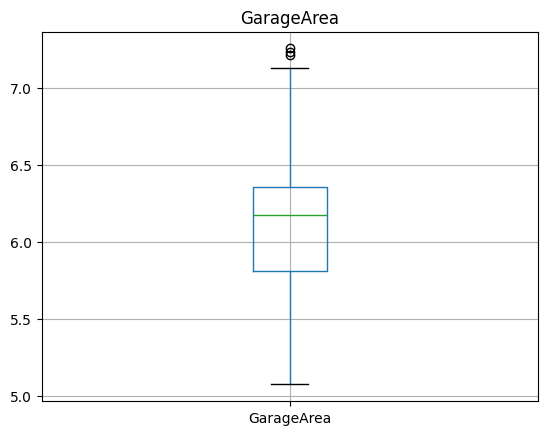

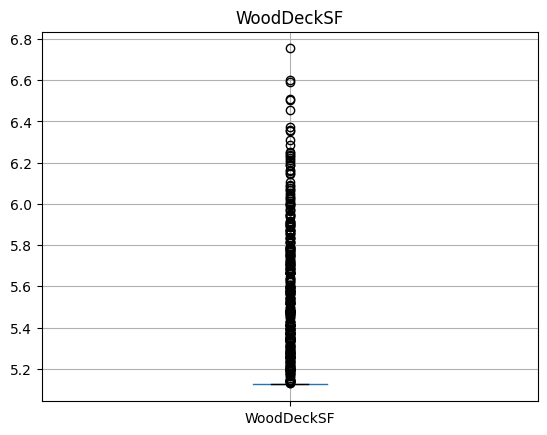

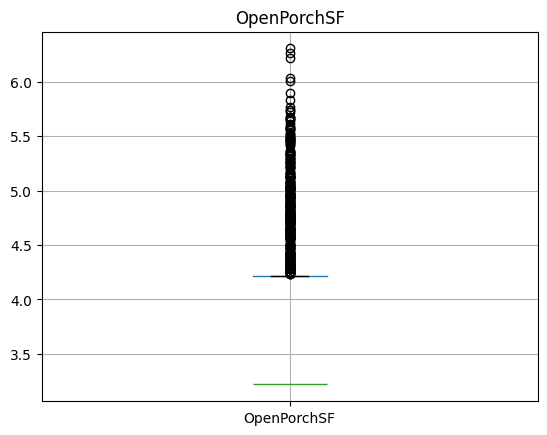

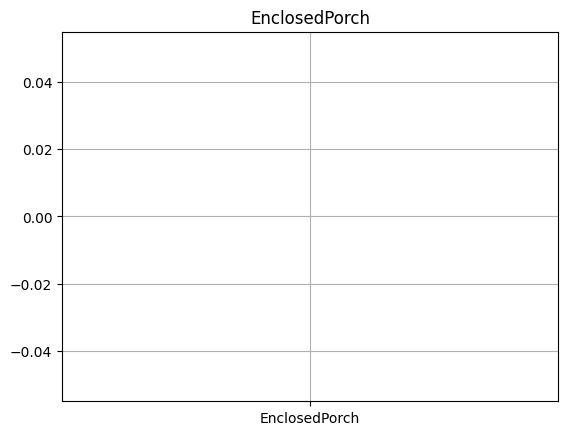

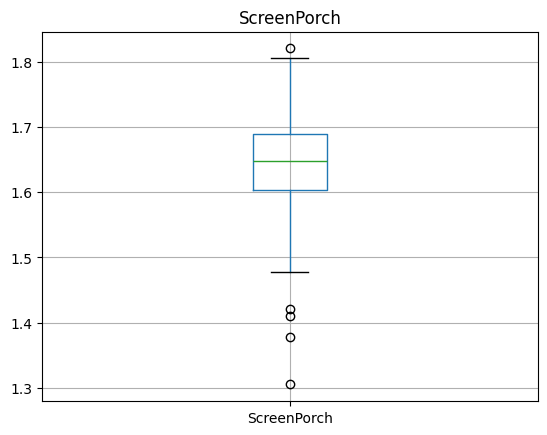

In [33]:
for feature in continous_feature:

    data[feature] = np.log(data[feature])
    data.boxplot(column=feature)
    plt.title(feature)
    plt.show()

## Categorical Feature

In [38]:
for feature in categorical_feature:
    if df[feature].nunique() > 10:
     print(f"{feature} number of unique values : {df[feature].nunique()}")

Neighborhood number of unique values : 25
Exterior1st number of unique values : 15
Exterior2nd number of unique values : 16


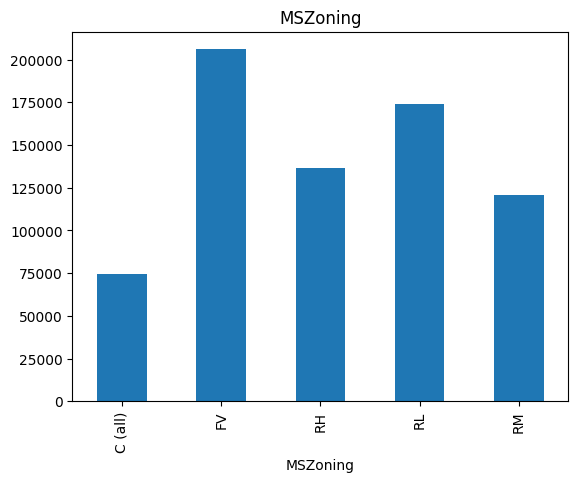

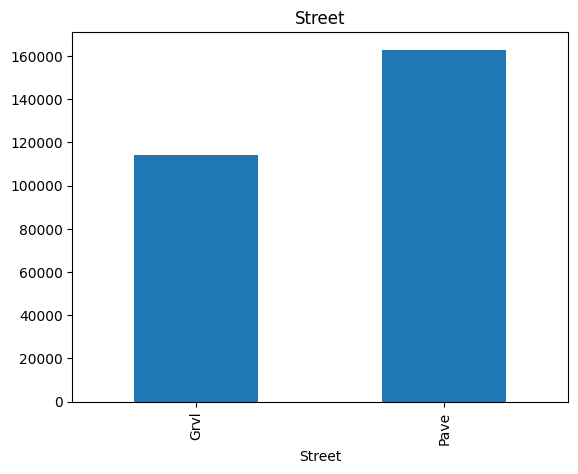

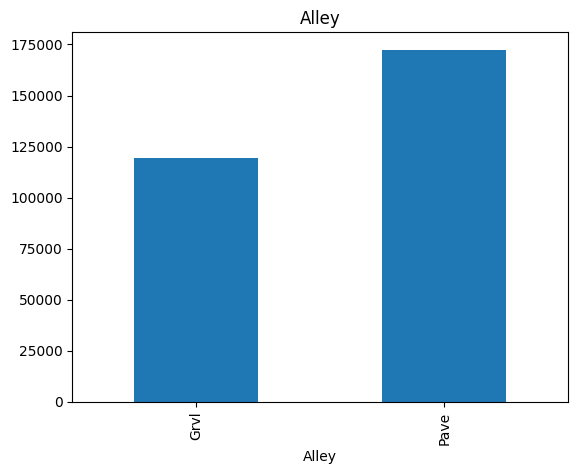

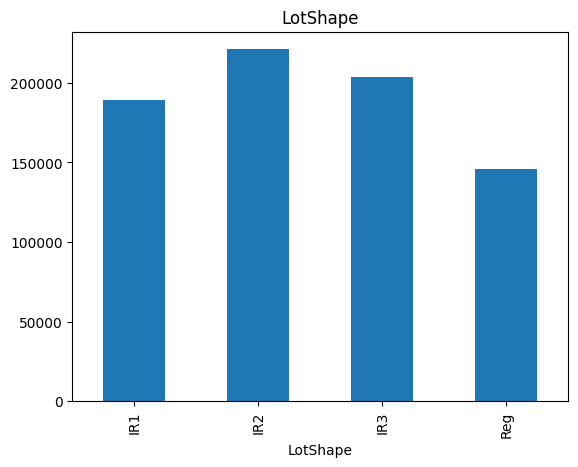

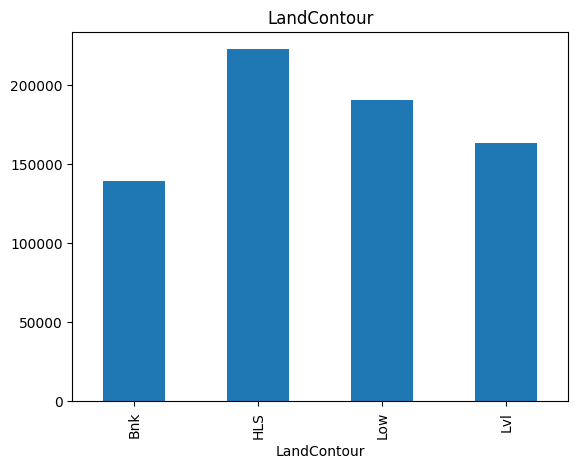

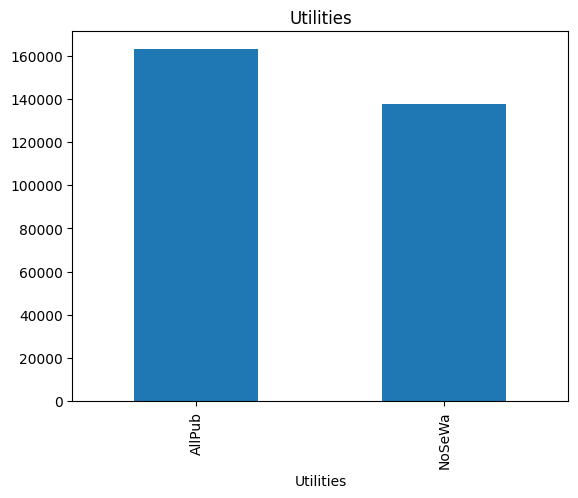

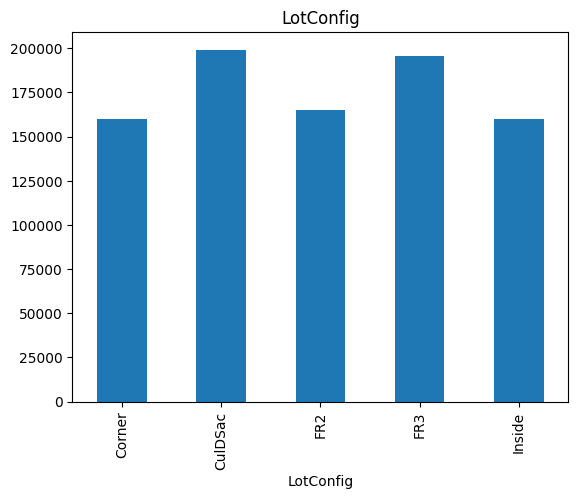

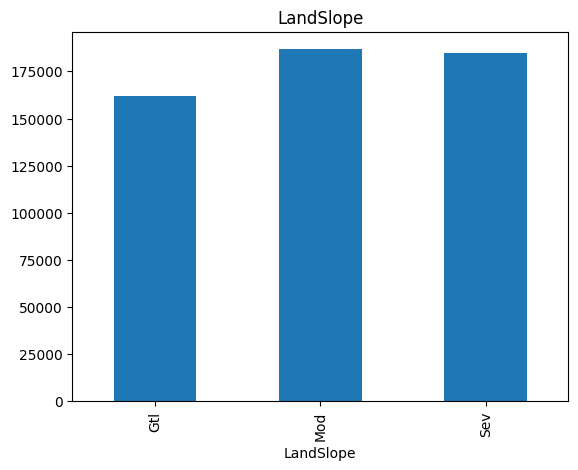

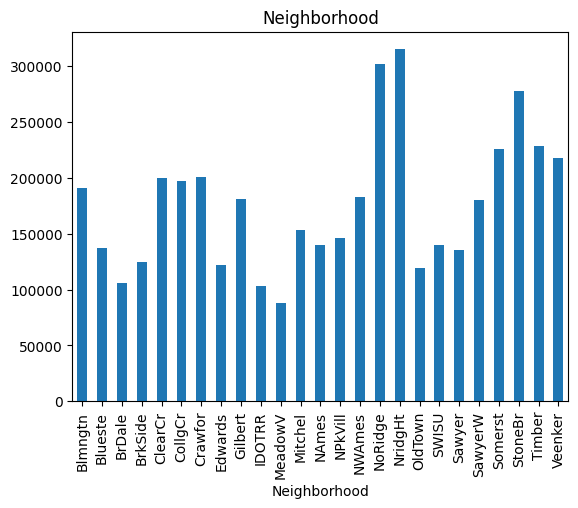

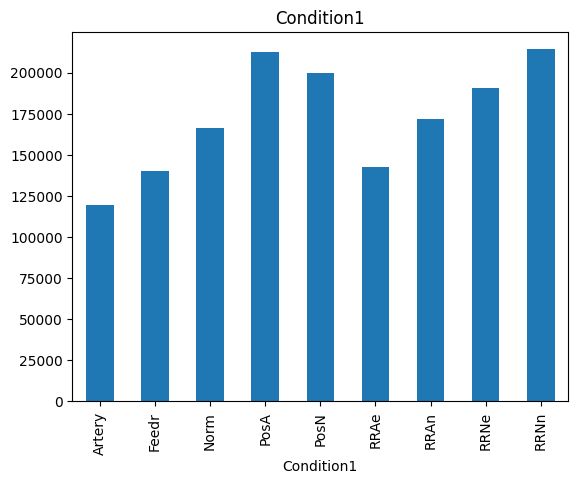

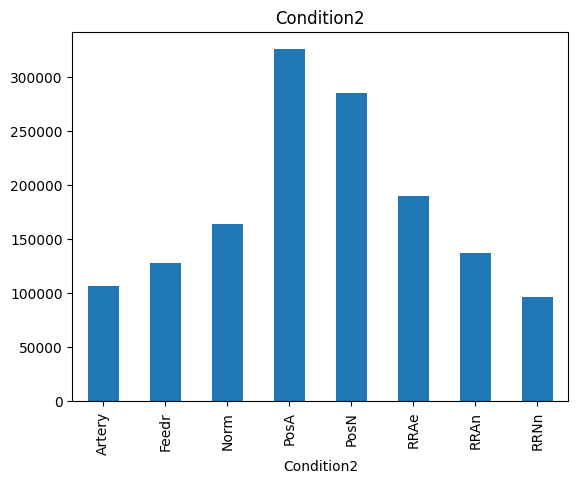

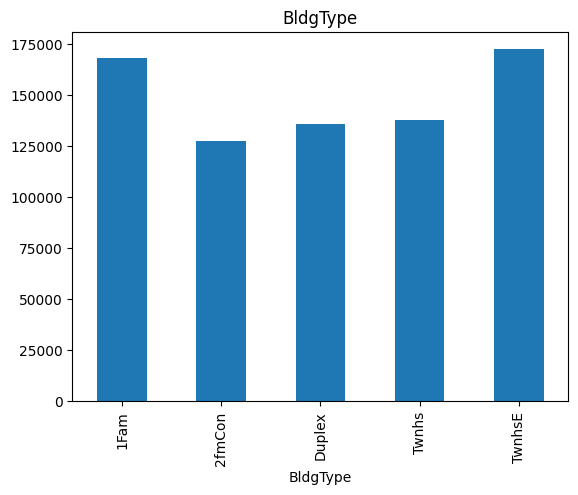

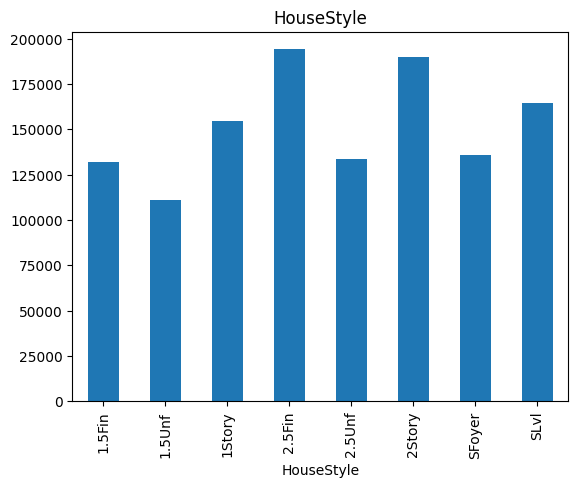

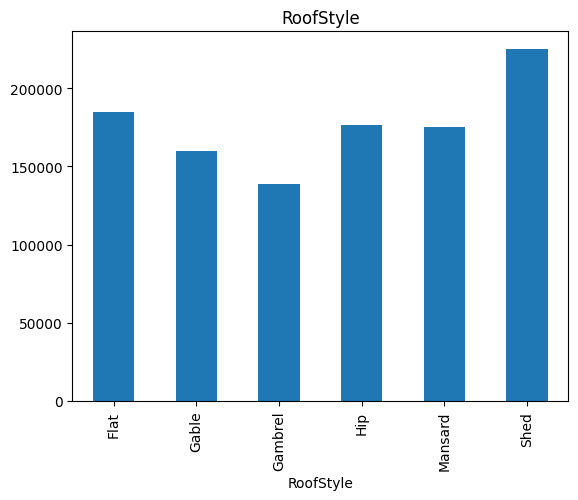

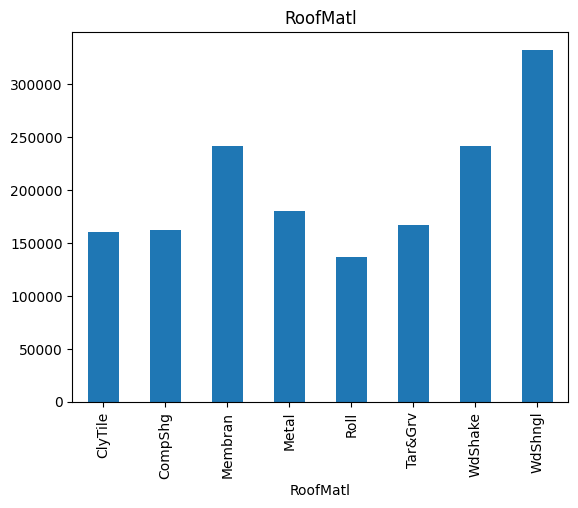

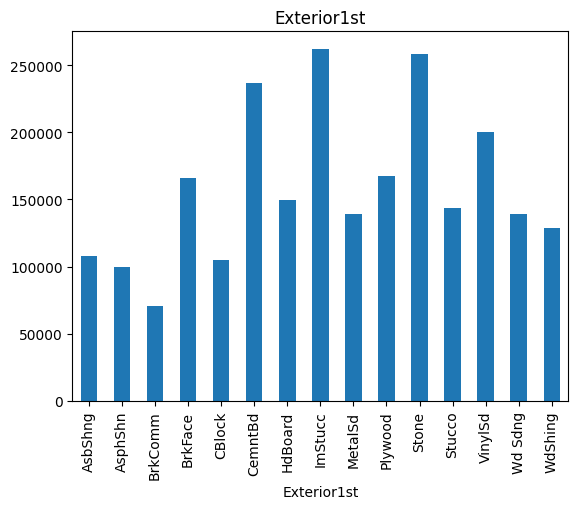

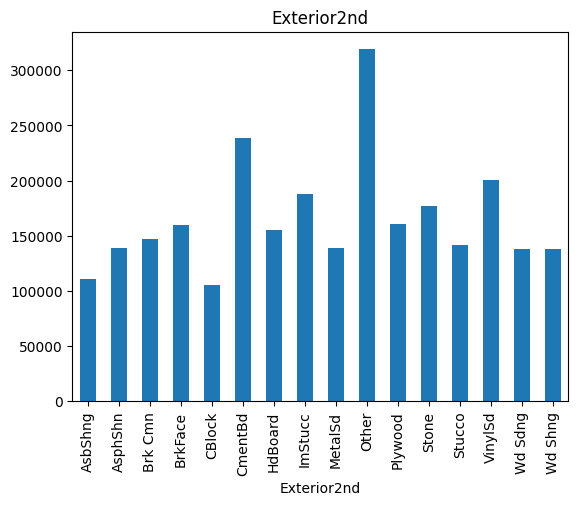

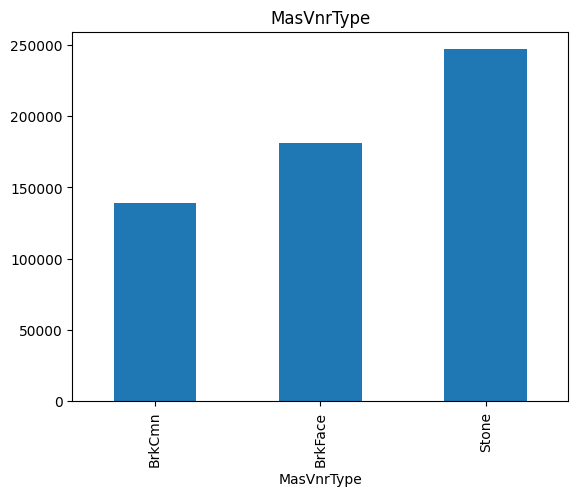

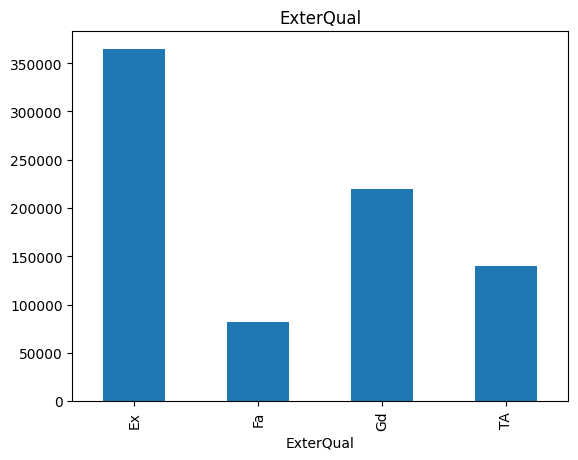

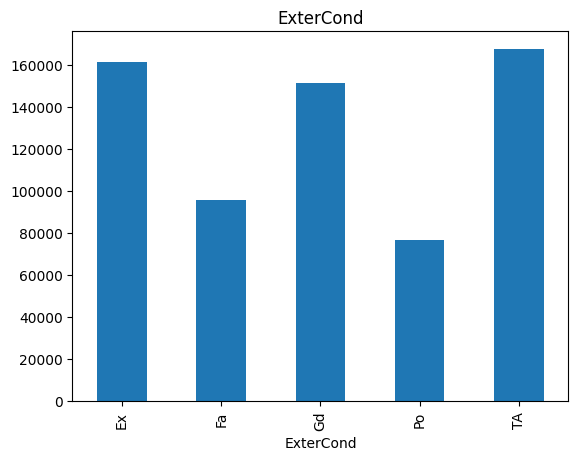

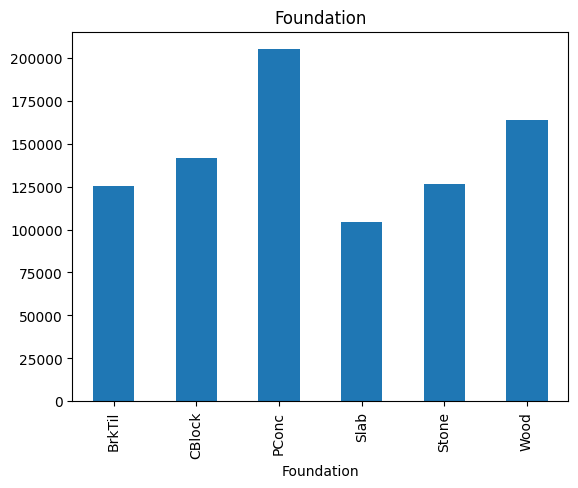

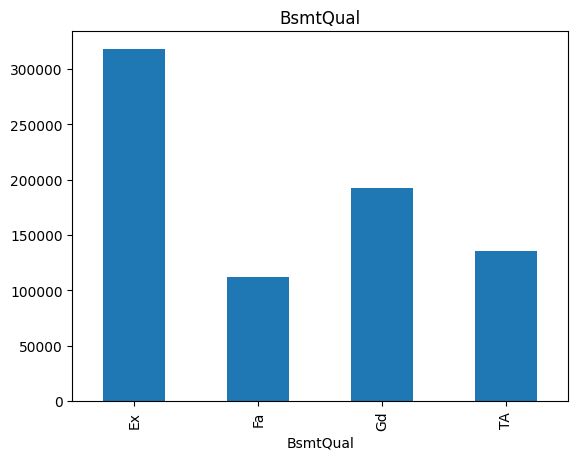

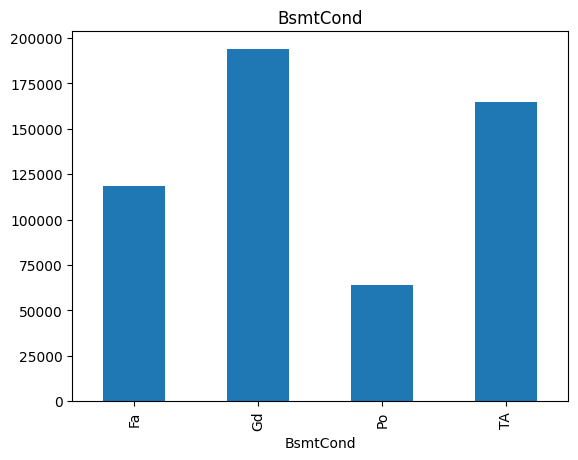

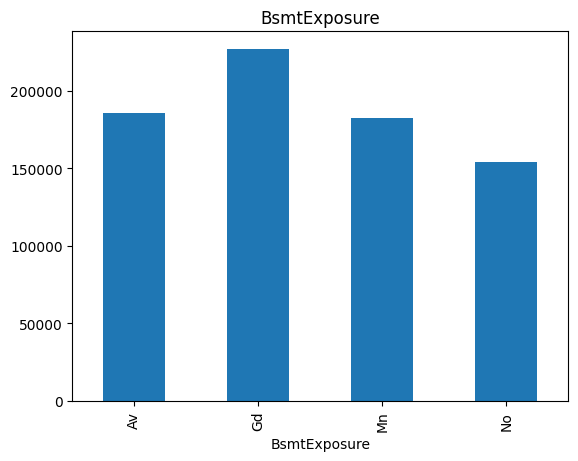

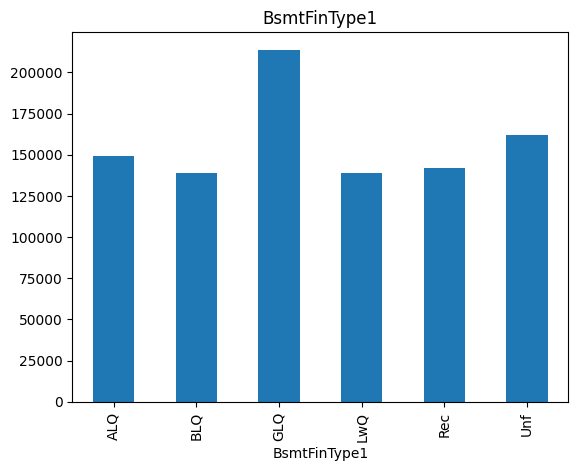

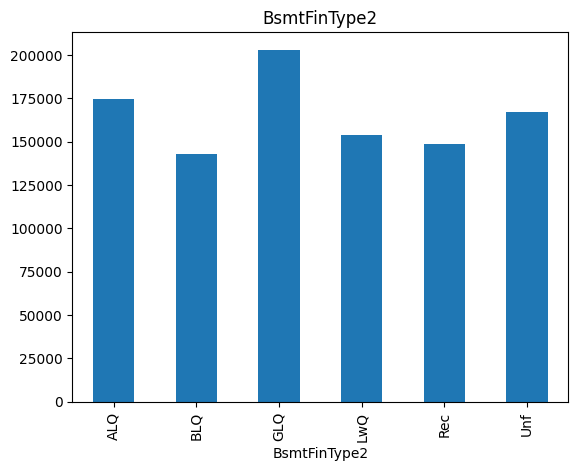

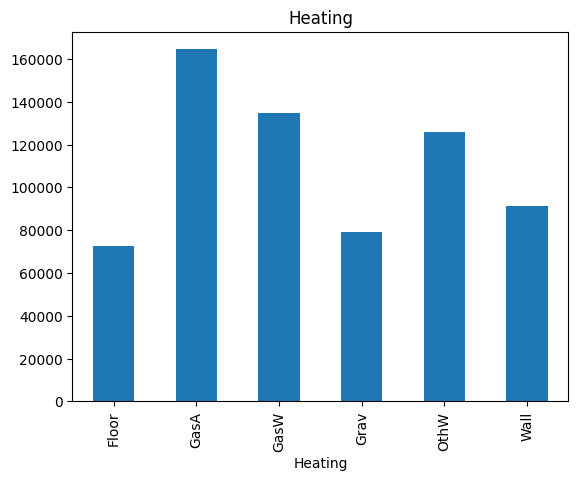

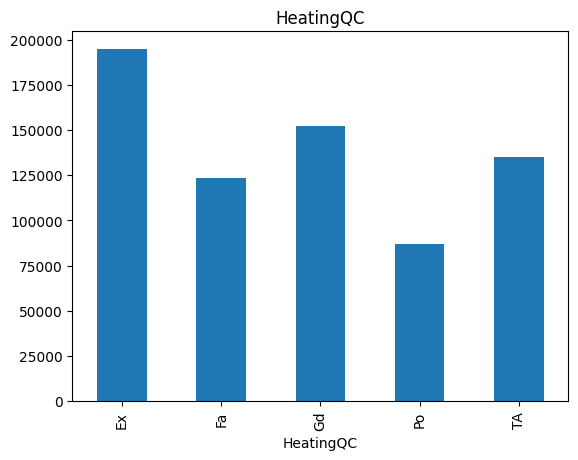

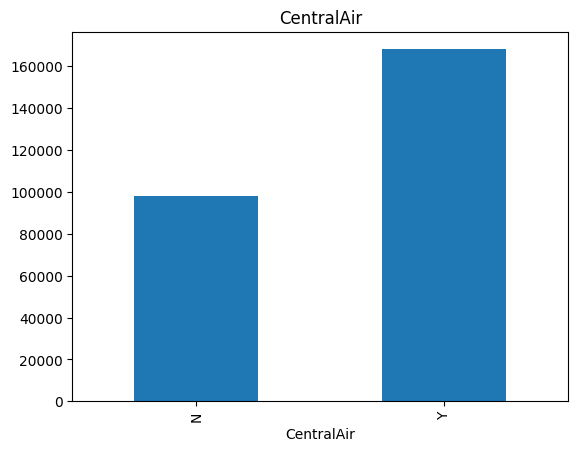

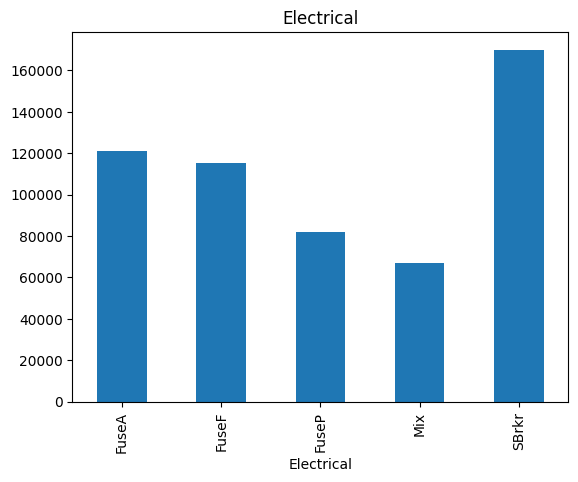

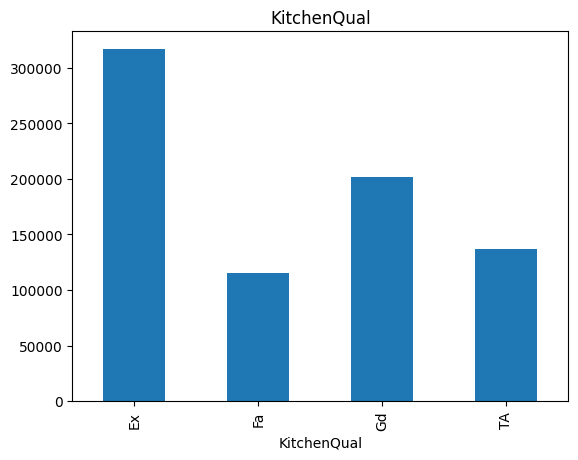

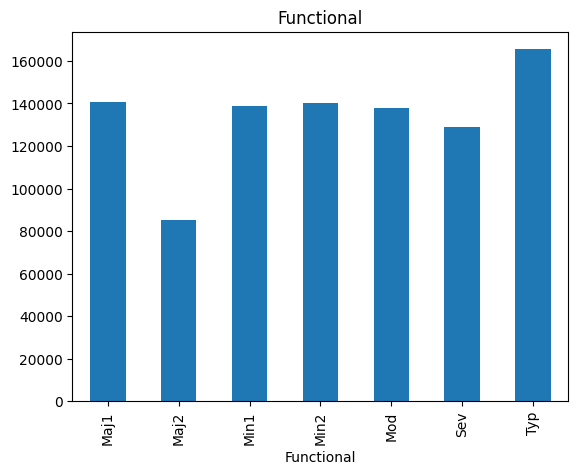

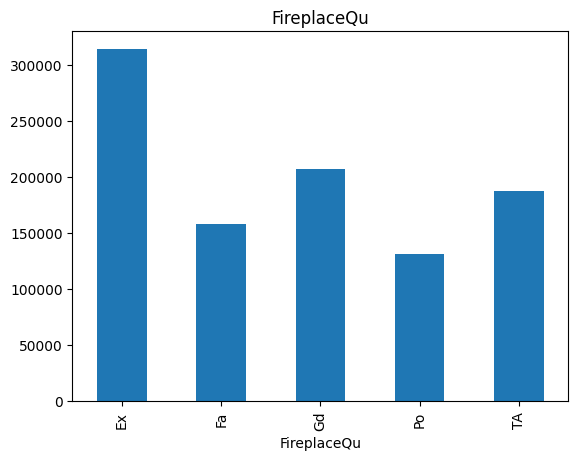

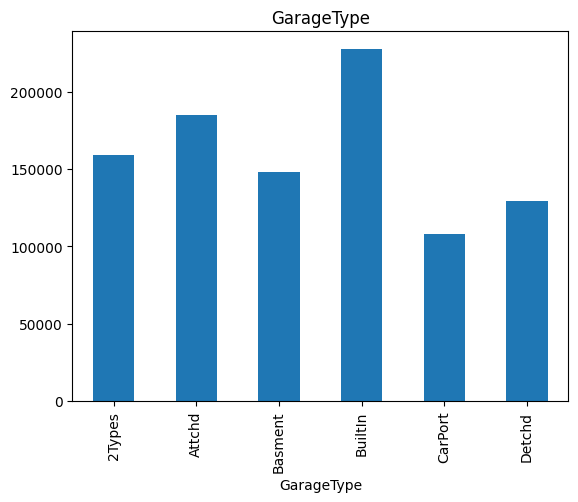

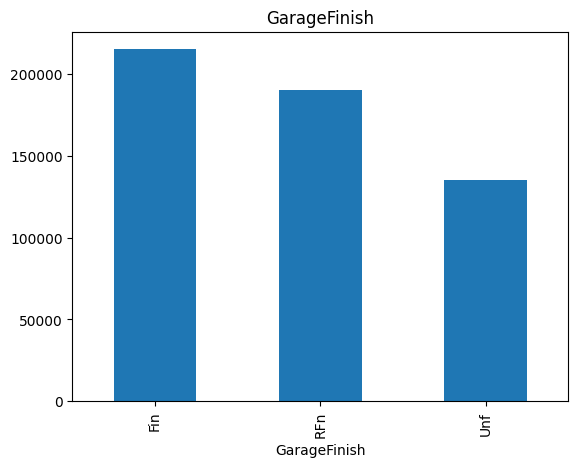

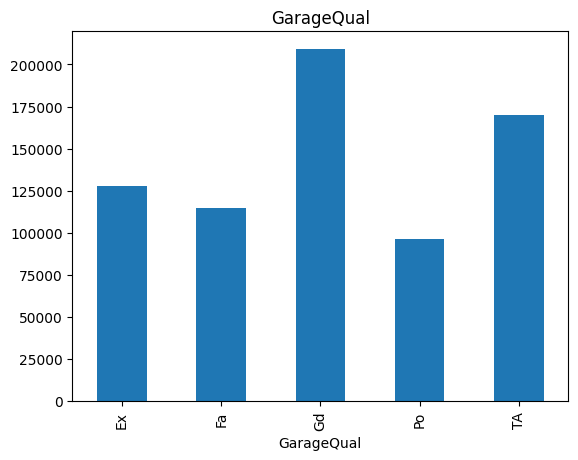

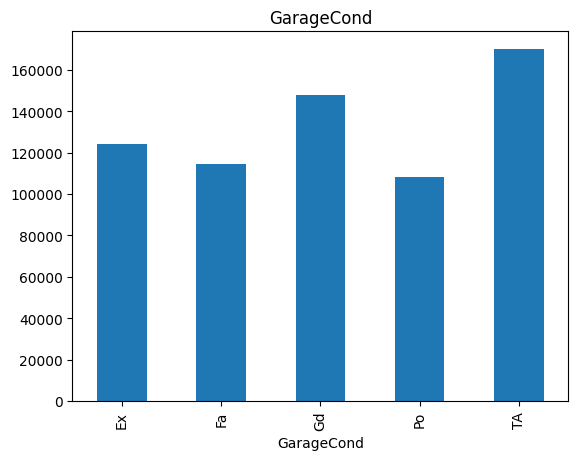

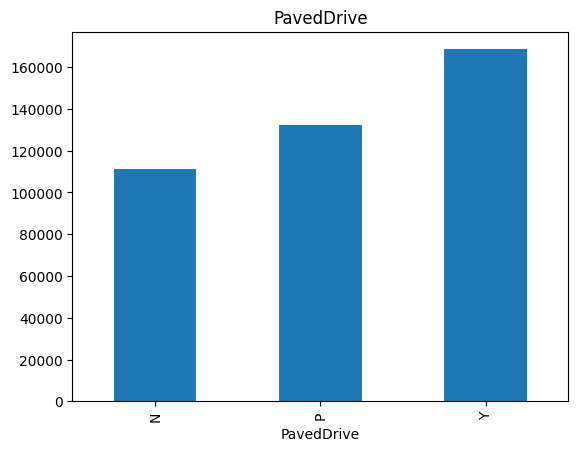

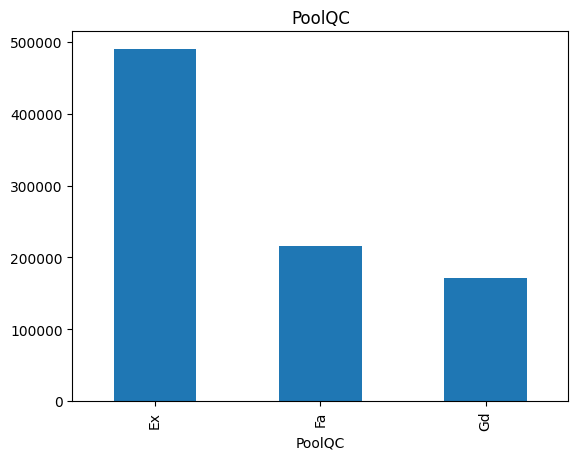

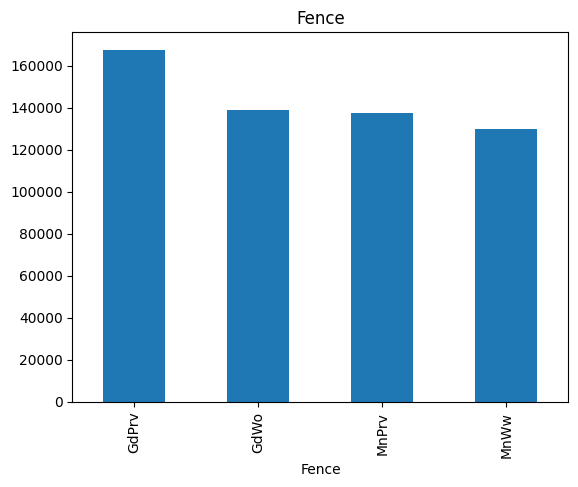

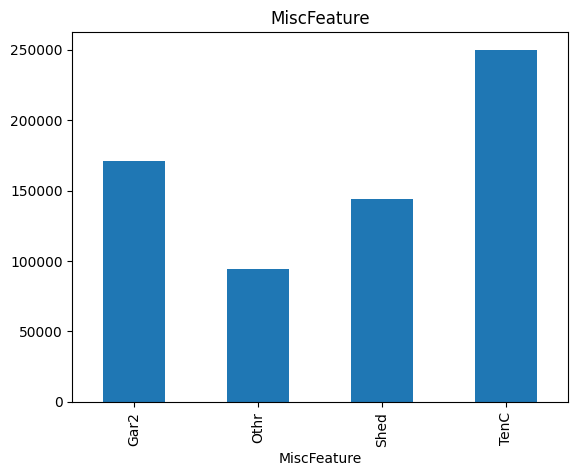

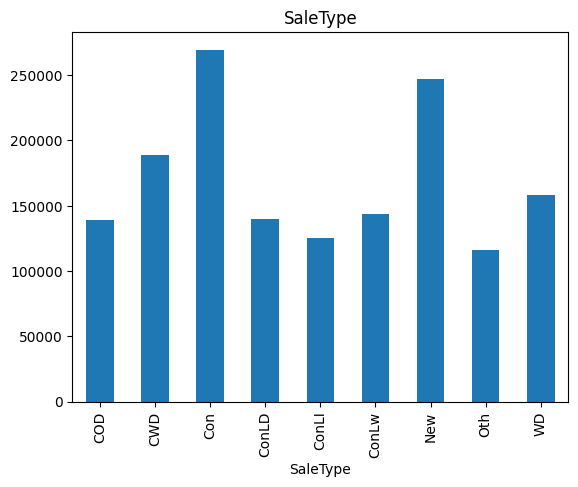

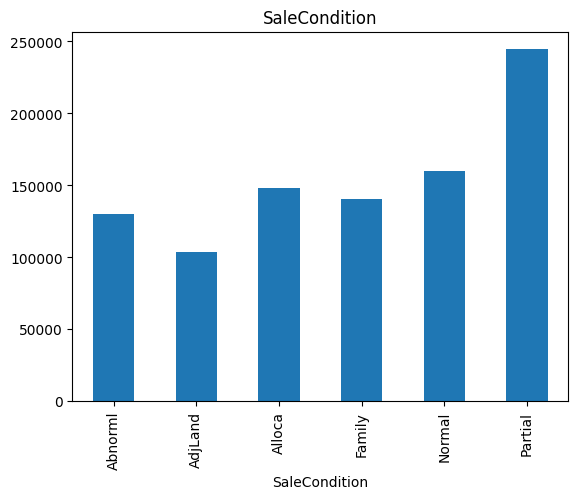

In [35]:
for feature in categorical_feature:
    data = df.copy()

    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()